# PyTorch Paper Replicating

Milestone Project 2: PyTorch Paper Replicating

In this project, we're going to be **replicating a machine learning research paper** and create a ***Vision Transformer(ViT)*** from scratch in PyTorch

We'll focus on creating the ViT architecture and apply to our FoodVision problem to classify different images of pizza, steak, and sushi.

## What is paper replicating?

The goal of **paper replicating** is to replicate the advances of machine learning with code so that we can use those techniques to our own problem.

We can use a new architecture that can work better on our own problem.

---

Machine Learning paper replicating involves turning a paper comprised of images/diagrams, math, and text into usable code. In our case usable PyTorch code.

![](08-vit-paper-what-is-paper-replicating-images-math-text-to-code.png)

We will convert Diagram, math equations and texts from a [ViT peper](https://arxiv.org/abs/2010.11929) in this project.

**How a Machine learning paper looks like?**
| Section |	Contents |
| :-: | :-:|
| Abstract| 	An overview/summary of the paper's main findings/contributions. |
| Introduction |	What's the paper's main problem and details of previous methods used to try and solve it. |
| **Method** | ***How did the researchers go about conducting their research? For example, what model(s), data sources, training setups were used?*** |
| **Results** |	*What are the outcomes of the paper? If a new type of model or training setup was used, how did the results of findings compare to previous works? (this is where **experiment tracking** comes in handy)* |
| Conclusion |	What are the limitations of the suggested methods? What are some next steps for the research community? |
| References |	What resources/other papers did the researchers look at to build their own body of work? |
| Appendix |	Are there any extra resources/findings to look at that weren't included in any of the above sections?|

## Why replicate a machine learning reseach paper?

A machine learning research paper is often a presentation of months if work and experiments done by some of the best machine leanring teams in the world condensed into a few pages of text.

It would be nice to check them out, if these experiments lead to better results in an area related to the problem we're working on.

***Also, replicating the work of others is a fantastic way to practice our skills.***
![](08-george-hotz-quote.png)

When we first start trying to replicate the research paper, we'll be overwhelmed.

Because, research paper is months/years of wors. It will take sometime to understand and reproduce the works. 

Replicating a research is a tough problem and lot of libraries, such as **`HuggingFace`**, **`PyTorch Image Models` (`timm`)** and **`fast.ai`** have been born out of making machine learning research more accessible.

***Where can we find code examples for machine learning research papers?***

One of the first things we'll notice when it comes to machine learning research is: **There's a lot of it**

So beware, trying to stay on top of it is like trying to outrun a hamster wheel.

Follow your interest, pick a few things that stand out to you.

There are several places to find and read machine learning reserach papers(and the code)

| Resource | What is it? |
| :-: | :-:|
| arXiv | a |
|Ak Twitter | a |
| Papers with Code | A curated collection of `trending`, `active` and `greatest machine learning papers`, many of which `include code` resources attached. Also `includes a collection of common machine learning datasets`, `benchmarks` and `current state-of-the-art models`. |
| lucidrains' `vit-pytorch` GitHub repository | Less of a place to find research papers and `more of an example of what paper replicating with code` on a `larger-scale` and `with a specific focus looks like`. The `vit-pytorch ` repository is a `collection of Vision Transformer model architectures` from `various research papers` **`replicated`** with **`PyTorch code`** (much of the inspiration for this notebook was gathered from this repository). |

## What we're going to cover

We're going to get hands-on and actually replicate a paper. 

***The process of replicating all papers will be slightly different but by seeing what it's like to do one, we'll get momentum ot do more.***

More specifically, we're going to be replicating the machine learning research paper [An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929) (ViT paper) with PyTorch.

The **Transformer** neural network architecture was originally introduced in the machine leanring research paper [Attention is all you need](https://arxiv.org/abs/1706.03762)

***And the original Transformer architecture was designed to work on one-dimensional sequences of text.**

A **Transformer architecture** is generally considered to be any neural network that uses the **attention mechanism**, as its primary learning layer.

This is similar to how convolutional neural network (CNN) uses convolutions as its primary learing layer.

**Vision Transformers (ViT) architecture was designed to adapt the original Transformer architecture to vision problem(s)**

The original Vision Transformer has been through several iterations over the past couple of years, however, we;re going to focus on replicating the original, otherwise known as the **vanilla Vision Transformer**. If we can recreate the original, we ca adapt it to others as well.

***<h3> We're going to focus on building Vit Architecture as per the original ViT paper and apply it to FoodVision.</h2>***

## Table of Contents

| Table | Contents |
| :-: | :-: |
| 0. Setting up | Download the previous code we have written and use it |
| 1. Get Data | Get data |
| 2. Create Datasets and DataLoaders | use `data_setup.py` for this |
| 3. Replicating the Vit Paper: an Overview | Breaking down paper into smaller chunks, so we can replicate the paper chunk buy chunk |
| 4. Equation 1: The Patch Embedding | a|
| 5. Equation 2: Multi-head Attention (MSA) | a|
|6. Equation 3: Multilayer Perceptron (MLP)| a|
|7. Creating the Transformer Encoder |a |
|8. Putting it all together to create ViT | a|
|9. Setting up training code for our Vit Model| a|
|10. Using a pretrianed ViT from `torchvision.models` | a |
|11. Make predictions on a custom image | a|

## 0. Setting up

In [76]:
import torch 
from torch import nn
import torchvision
from torchinfo import summary

print(f"torch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")

torch version: 2.2.2
torchvision version: 0.17.2


In [77]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 1. Get Data

We'll use the `download_data` function from `helper_functions.py` that we created on 07. 

In [4]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data/pizza_steak_sushi directory exists, skipping download.


PosixPath('data/pizza_steak_sushi')

Now let's set the download training and test directories.

In [5]:
train_dir = image_path  / 'train'
test_dir = image_path / 'test'
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## 2. Create Datasets and DataLoaders

let's convert the data we downloaded to `DataLoader`

we'll use `create_dataloaders()` frm `data_setup.py`

<hr/>
First, we'll create a transform to prepare our images.

***This is where one of the first references to ViT paper will come in.***

In Table 3 (of the ViT Paper), the training resolution is mentioned as being 224 (height = 224, width = 224)
![](08-vit-paper-image-size-and-batch-sizepng)

**Note:** We can often find various hyperparameter settings listed in a table. In this case we're still preparing our data so ***we're mainly concerned with thing like image size and batch size.***

We'll make sure our transform resizes our images appropriately.

`Since we'll be training our model from scratch (no transfer learning), we dont't have to normalize transform like we did in Transfer learning module.`

### 2.1. Prepare transforms for images

In [6]:
IMG_SIZE = 224

# create transform pipeline manually
manual_transform = transforms.Compose([
    transforms.Resize(size=(IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor()
])

manual_transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)

### 2.2. Turn Images into `DataLoader`

The ViT paper states that use of of `batch size = 4096` which is 128x the size of the batch size we've been working on.

However, we're going to stick with the batch size of 32.

because of the hardware not being able to handle that many images at a time.

**Note:** we're using `pin_memory=True` becuase it avoids unnecessary copying of memory between the CPU and GPU memory by `pinning` examples that have been seen before. The benefits of this is likely to be seen with larget dataset sizes.

Also `pin_memory=True` doesn't always improve performance. It works sometimes, sometimes it doesn't work.

In [7]:
BATCH_SIZE = 32

#create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transform,
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x10725a5c0>,
 ['pizza', 'steak', 'sushi'])

### 2.3 Visualize a single image

An important step in the ViT paper is `preparing the images` into patches.

We'll get to what this means in section 4 but for now, lets view a single image and its label.

In [8]:
# get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# get a single image from the batch
image, label = image_batch[0], label_batch[0]

image.shape, label

(torch.Size([3, 224, 224]), tensor(0))

Now let's view images with `matplotlib`

(-0.5, 223.5, 223.5, -0.5)

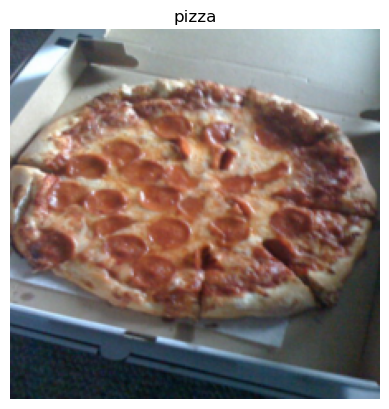

In [9]:
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)

## 3. Replicating the ViT Paper: An Overview

Before writing any more code, we should know what we're doing.

We're replicating the `ViT paper` for our own problem - FoodVision.

So our **model inputs** are: `images` of **pizza, steak, or sushi**

and our ideal **model outputs** are: `predicted labels of **pizza, steak, or sushi**

No different to what we've been doing throughout the previous sections.

The question is: **how do we go from our inputs to the desired outputs?**

### 3.1. Inputs and outpus, layers, and blocks

ViT is a deep learning neural network architecture.

And any neural network architecture is generally comprised of **`layers`**

And a collection of layers is often referred to as a `block`.

and stacking many blocks together is what gives us the whole architecture.

---

A **layer** takes an `input`(say an image tensor), performs some kind of function on it (for example what's in the layer's `forward()` method) and then return the output from it.

So if a single layer takes an input and gives an output, then a collection of layers or or a `block` also takes an input and gives an output.

<div class='alert alert-success'>
    Lets make this concrete:
</div>

- **`Layer`** - Takes an `input`, performs a `function` on it, and returns an ouput
- **`Block`** - A `collection of layers`, takes an input, performs a series of functions on it, and returns an output.
- **`Architecture` or model** - a `collection of blocks`, takes an input, performs a series of functions on it, returns an output.

**This ideology is what we're going to be using to replicate the ViT Paper**

We're going to take it `layer by layer`, `block by block`, and `function by function` putting the pieces of the puzzle together like Lego to get our desired overall architecture.

<span class='alert alert-success'> The reason we do this is because looking at a whole research paper can be intimidating.</span>

So for a better understanding, we'll break it down.
- Starting with the inputs and outputs of single layer
- and working up to the inputs and outputs of the whole model.

![](08-vit-paper-intputs-outputs-layers-and-blocks.png)
*A modern deep learning architecture is usually collection of layers and blocks. Where layers take an input. and maniputate it using some kind of function, and then output it. `Blocks` are generally stacks of layers on top of each other doing a similar thing to a single layer but multiple times*

- `input` - data as a numerial representation
- `function` - the self-attention formula pictured above, however, this function could be almost anything

### 3.2. Getting Specific: What's ViT made of?

There are many little details about the ViT model sprinkled throughout the paper.

Finding them all is like one big treasure hunt.

Remember, **A research paper is often months of work compressed into a few pages so it's understandable for it to take of practice to replicate.**

However, the main three resources we'll be looking at for the architecture design are:
1. **Figure 1** - This gives an overview of the model in a graphical sense, we could almost recreate the architecture with this figure alone.
2. **Four equations in section 3.1** - These equations give a little bit more of a mathematical grounding to the colored blocks in Figure 1.
3. **Table 1** - This table shows the various hyperparameter settings (such as number of layers asnd number of hidden units) for different ViT model variants. We'll be focused on the smallest version,`ViT-Base`.


#### 3.2.1 Exploring **`Figure 1`**
Let's start by going through Figure 1 of the ViT Paper.

The main things we'll be playing attention to are:

1. **Layers** - takes an **`input`**, performs an operation or function on the input, produces an **`ouput`**
2. **Blocks** - a collection of layers, which in turn also takes an **input** and produces an **output**

![](08-vit-paper-figure-1-inputs-and-outputs.png)

*Figure 1 from the ViT Paper showcasing the different inputs, outputs, layers, and blocks that create the architecture. Our goal will be to replicate each of these using PyTorch code.*

The ViT architecture is comprised of several stages:

- **Patch + Position Embedding (inputs)** - Turns the input image into a sequence of image patches and adds a position number to specify in what order the patch comes in.
  
- **Linear projection of flattened patches (Embedded Patches)** - The image patches get turned into an **embedding**, the benefit of using an embedding rather than just the image values is that an embedding is a *learnable* representation (typically in the form of a vector) of the image that can improve with training.

- **Norm** - This is short for `Layer Normalization` or `LayerNorm`, a techinique for regularizing (reducing overfitting) a neural network, you can use `LayerNorm` via the PyTorch layer `torch.nn.LayerNorm()`

- **Multi-Head Attention** - This is a `Multi-Headed Self-Attention layer` or `MSA` for short. We can create an MSA layer via the PyTorch layer `torch.nn.MultiheadAttention()`

- **MLP (or Multilayer perception)** - A MLP can often refer to any collection of feedforward layers(or in PyTorch's case, a collection of layers with `forward()` method). In the ViT paper, the authors refer to the MLP as `MLP block` and it contains two `torch.nn.Linear()` layers with a `torch.nn.GELU` non-linearity activation in between them (section 3.1) and a `torch.nn.Dropout()` layer after each(Appendix B.1)

- **Transformer Encoder** - The Transformer Encoder, is a collection of the layers listed above There are two skip connections inside the Transformer encoder(the '+' symbols) meaning the layer's input are fed directly to immediate layers as well as subsequent layers. The overall ViT architecture is comprised of a number of Transfer encoders stacked on top of eachother.

- **MLP Head** - This is the output layer of the architecture, it converts the learned features of an input to a class ouput. Since we're working on image classification, you could also call this the `classifier head`. The structure of the MLP Head is similar to the MLP block.


We might notice that many of the pieces of the ViT architecture can be created with existing PyTorch layers.

This is because of how PyTorch is designed, it's one of the main purposes of PyTorch to create resuable neural network layers for both researchers and machine learning practitioners

> **Question**: Why not code everything from scratch?
> 
> We could definitely do that by reproducing all of the math equations from the paper with custom PyTorch layers and that would certainly be an educative exercise, however, using pre-existing PyTorch layers is usually favoured as pre-existing layers have often been extensively tested and performance checked to make sure they run correctly and fast.

> **Note**: we're going to be focused on writing PyTorch code to create these layers. For the background on what each of these layers does, reading the ViT Paper in full or reading the linked resources for each layer is advised.

![](08-vit-paper-figure-1-inputs-and-outputs-food-mini.png)
*Figure 1 from the ViT Paer adapted for use with FoodVision. An image of food goes in (pizza), the image gets turned into patches, and then projected to an embedding. The embedding then travels through the various layers and blocks and (hopefully) the class 'pizza' is returned.*

#### 3.2.2. Exploring the Four Equations

The next main part(s) of the ViT paper we're going to look at are the four equations in `section 3.1`
![](08-vit-paper-four-equations.png)

These *four equations* represent the math behind the four major parts of the ViT architecture.

*Section 3.1* describes each of these.

| Equation number |	Description from ViT paper section 3.1|
|:-: | :-:|
|1 | ...The Transformer uses constant latent vector size $D$ through all of its layers, so we flatten the patches and map to $D$ dimensions with **a trainable linear projection** (Eq. 1). We refer to the output of this projection as the **patch embeddings**... **Position embeddings** are added to the patch embeddings to retain positional information. We use standard **learnable 1D position embeddings**... |
|2 |	The Transformer encoder (Vaswani et al., 2017) consists of alternating layers of multiheaded selfattention (MSA, see Appendix A) and MLP blocks (Eq. 2, 3). **Layernorm (LN) is applied before every block, and residual connections after every block** (Wang et al., 2019; Baevski & Auli, 2019).|
|3|	Same as equation 2.|
|4|	Similar to BERT's [ *class* ] token, we **prepend a learnable embedding to the sequence of embedded patches** $\left(\mathbf{z}_{0}^{0}=\mathbf{x}_{\text {class }}\right)$, whose state at the output of the Transformer encoder $\left(\mathbf{z}_{L}^{0}\right)$ serves as the image representation $\mathbf{y}$ (Eq. 4)...|

Let's map these descriptions to the ViT architecture in Figure 1.
![](08-vit-paper-mapping-the-four-equations-to-figure-1.png)

There's a lot happening in the image above but following the colored lines and arrows receals the main concepts of the ViT Architecture.

**`Let's break down each equation further (it will be our goal to recreate these with code):`**

In all equations (except 4), "$\mathbf{z}$" ` <- is the raw output of a particular layer` :
1. "$\mathbf{z}_{0}$" is `z zero` (this is the ouput of the initial patch embedding layer)
2. "$\mathbf{z}_{\ell}^{\prime}$"  is `z of a particular layer prime` (or an intermediary value of z)
3. "$\mathbf{z}_{\ell}$" is `z of a particular layer`

And $\mathbf{y}$ is the overall output of the architecture.

#### 3.2.3 Equation 1 overview
$$ \begin{aligned} \mathbf{z}_{0} &=\left[\mathbf{x}_{\text {class }} ; \mathbf{x}_{p}^{1} \mathbf{E} ; \mathbf{x}_{p}^{2} \mathbf{E} ; \cdots ; \mathbf{x}_{p}^{N} \mathbf{E}\right]+\mathbf{E}_{\text {pos }}, & & \mathbf{E} \in \mathbb{R}^{\left(P^{2} \cdot C\right) \times D}, \mathbf{E}_{\text {pos }} \in \mathbb{R}^{(N+1) \times D} \end{aligned} $$

This equation deals with the class token, path embedding, and position embedding ($\mathbf(E)$ is for embedding)  of the input image.

In vector form, the embedding might look something like:

**<div class='alert alert-info'> x_input = [class_token, image_patch_1, image_patch_2, image_patch_3...] + [class_token_position, image_patch_1_position, image_patch_2_position, image_patch_3_position...]</div>**

Where each of the elements in the vector is learnable (i.e. `requires_grad=True`)

#### 3.2.4 Equation 2 Overview
$$\begin{aligned} \mathbf{z}_{\ell}^{\prime} &=\operatorname{MSA}\left(\operatorname{LN}\left(\mathbf{z}_{\ell-1}\right)\right)+\mathbf{z}_{\ell-1}, & & \ell=1 \ldots L \end{aligned} $$


This says that for every layer from $1$ through $L$ (total number of layers), there's a `Multi-Head Attention layer (MSA)` wrapping a `LayerNorm (LN) layer`.

The addition on the end is the equivalent of adding the input to the output and forming a [skip/residual connection](https://paperswithcode.com/method/residual-connection).

We'll call his layer the `MSA block`

In pseudocode, this looks like:
**<div class='alert alert-info'> x_output_MSA_block = MSA_layer(LN_layer(x_input)) + x_input</div>**

Notice the `skip connection` on the end (adding the input of the layers to the output of the layers)

#### 3.2.5 Equation 3 Overview

$$ \begin{aligned} \mathbf{z}_{\ell} &=\operatorname{MLP}\left(\operatorname{LN}\left(\mathbf{z}_{\ell}^{\prime}\right)\right)+\mathbf{z}_{\ell}^{\prime}, & & \ell=1 \ldots L \\ \end{aligned} $$

This says that, for every layer from $1$ to $L$(the total number of layers), there's also a Multilayer Perceptron layer(MLP) wrapping a LayerNorm layer (LN)

The addition on the end is showing the presence of a skip/residual connection.

We'll call this layer `MLP Block`

the pseudocode might look like :
**<div class='alert alert-info'> x_output_MLP_block = MLP_layer(LN_layer(x_output_MSA_block)) + x_output_MSA_block</div>**

Notice the skip connection on the end (adding the input of the layers to the output of the layers).

#### 3.2.4. Equation 4 Overview

$$ \begin{aligned} \mathbf{y} &=\operatorname{LN}\left(\mathbf{z}_{L}^{0}\right) & & \end{aligned} $$

This says for the last layer $L$, the output $y$ is the 0 index token of $z$ wrapped in a LayerNorm layer (LN).

Or in our case, the 0 index of `x_output_MLP_block`:

**<div class='alert alert-info'>y = Linear_layer(LN_layer(x_output_MLP_block[0]))</div>**

Of course there are some simplifications above but we'll take care of those when we start to write PyTorch code for each section.

#### 3.2.7 Exploring Table 1

The final piece of the ViT architecture puzzle, we'll focus on Table 1.

| Model| Layers| Hidden size $D$ | MLP size | Heads | Params |
| :-: | :-: | :-:|:-:|:-:|:-:|
|ViT-Base|	12|	768|	3072|	12|	$86M$|
|ViT-Large|	24|	1024|	4096|	16|	$307M$|
|ViT-Huge|	32|	1280|	5120|	16| $632M$|

*Table 1: Details of Vision Transformer model variants. Source: ViT paper.*

This table is showcasing th various hyperparameters of each of the ViT architectures.

We can see the numbers are gradually increasing from ViT-Base to ViT-Huge.

We're going to focus on replicating ViT-Base but we'll be writing code that could easily scale up to the larger variants.

**Breaking the hyperparameters down:**
1. **Layers**
   - How Many `Transformer Encoder` blocks are there? (each of these will contain a MSA block and MLP block)
3. **Hidden size $D$**
   - This is the embedding dimension throughout the architecture, this will be the size of the vector that our image gets turned into when it gets patched and embedded. Generally, the larger the embedding dimension, the more information can be captured, the better results. However, a larger embedding comes at the cost of more compute.
5. **MLP Size**
   - What are the numbers of hidden units in the MLLP layers.
7. **Heads**
   - How many heads are there in the Multi-Head Attention layers?
9. **Params**
    - What are the total number of parameters of the model? Generally, more parameters leads to better performance but at the cost of more compute. We'll notive even ViT-Base has far more parameters than any other model we've used so far.
  
We'll `use` these `values` as the `hyperparameter settings` for our `ViT architecture`.

### 3.3 Workflow for replicating Papers

**<div class='alert alert-danger'>Important 🔥</div>**

When going through replicating a paper, do the following steps:
1. Read the whole paper end to end
   - Get the idea of main concepts
2. Go back through each section and see how they line up with each other and start thinking about how they might turn into a code.
3. Repeat ($2$) ulltil you get a faily good ouline
4. Use [Simpletex.net](simpletex.net) to turn any section of the paper into markdown/latex to put into notebook.
5. Replicate the simplest of the model possible.
6. If you got stuck, look up other examples.

We've already gone through the first few steps above(and if you haven't read the full paper yet, i'd encourage you to give it a go(but what we'll be focusing on next is `Step 5: replicating the simplest version of the model possible.`

This is why we're starting with ViT-Base.

Replicating the smallest version of the srchitecture possible, get it working and then we can scale up if we want to.

## 4. Equation 1: Split data into patches and creating the class, position, and patch embedding

Remember that, **'*It's all about the embedding*'**.

As in, if you can represent your data in a good, learnable way(as **embeddings are learnable represenations**)
- chances are, a learning algorithm will be able to perform well on them.

**<div class='alert alert-success'>Exciting Part: </div>**

With that being said, let's start by creating the class, position, and patch embeddings for the ViT architecture

We'll start with the **Patch Embedding**
- This means we'll turning our input images into a sequence of patches and then embedding those patches.

- Recall that an `Embedding` is a learnable representation of some form and is often a `vector`

The tern *learnable* is important because this means the numerical representation of an input images can be improved over time.

We'll begin by following th eopening paragraph of section 3.1 of the ViT Paper
> The standard Transformer receives as input a 1D sequence of token embeddings. To handle 2D images, we reshape the image $\mathbf{x} \in \mathbb{R}^{H \times W \times C}$ into a sequence of flattened 2D patches $\mathbf{x}_{p} \in \mathbb{R}^{N \times\left(P^{2} \cdot C\right)}$, where $(H, W)$ is the resolution of the original image, $C$ is the number of channels, $(P, P)$ is the resolution of each image patch, and $N=H W / P^{2}$ is the resulting number of patches, which also serves as the effective input sequence length for the Transformer. The Transformer uses constant latent vector size $D$ through all of its layers, so we flatten the patches and map to $D$ dimensions with a trainable linear projection (Eq. 1). We refer to the output of this projection as the **patch embeddings**.


And size we're dealing with image shapes, let's keep in mind the line from Table 3 of the ViT paper:

> Training resolution is ***224***.

**Let's break down the text above:**
- $D$ is the size of the **path embeddings**, different values for $D$ for various sized ViT models can be found in Table 1.
- The image stars as 2D with size ${H\times W\times C}$
  - $(H,W)$ is the resolution of the original image (height, width)
  - $C$ is the number of color channels
- The image gets converted to a sequence of flattened 2D patches of size ${N \times\left(P^{2} \cdot C\right)}$
  - $(P, P)$ is the resolution of each image path (**patch size**)
  - $N=H W / P^{2}$ is the resulting number of patches ,which also serves as the input sequence length for the Transformer.

![](08-vit-paper-equation-1-annotated.png)

### 4.1 Calculating patch embedding input and output shapes by hand

How about we start by calculating these input and output shape values by hand?

To do so, let's create some variables to mimic each of the terms (such as $H$, $W$, etc) above.

We'll use a patch ($P$) of 16 since it's the best performing version of ViT-Base uses (see column 'ViT-B/16' of Table 5 in the ViT paper)

In [10]:
# create example values

height = 224 # H
width = 224 # W
color_channels = 3 # C
patch_size = 16 # P

# Calculate N (Number of patches)
number_of_patches = int((height*width)/patch_size**2)
print(f"Number of patches (N) with image height (H={height}), width (W={width}) and patch size (P={patch_size}): {number_of_patches}")

Number of patches (N) with image height (H=224), width (W=224) and patch size (P=16): 196


We've got the number of patches, how about we create the image output size as well?

Better yet, let's replicate the input and output shapes of the patch embedding layer.

***Recall:***
- **Input**: THe image starts as 2D with size ${H \times W \times C}$.
- **Output**: The image gets converted to a sequence of flattened 2D patches with size ${N \times\left(P^{2} \cdot C\right)}$.

In [11]:
# input shape ( this is the size of single image)
embedding_layer_input_shape = (height, width, color_channels)

# outpu shape
embedding_layer_output_shape = (number_of_patches, patch_size**2 * color_channels)

print(f"Input shape (single 2D image): {embedding_layer_input_shape}")
print(f"Output shape (single 2D image flattened into patches): {embedding_layer_output_shape}")

Input shape (single 2D image): (224, 224, 3)
Output shape (single 2D image flattened into patches): (196, 768)


### 4.2 Turning a single image into patches

Now we know the ideal input and output shapes for our **patch embedding** layer, let's move towards making it.

What we're doing is breaking down the overall architecture into smaller pieces, focusing on the inputs and outputs of individual layers.

**So how do we create the partch embedding layer?**

We'll get to that shortly, first, lets *visualize, visualize, visualize!* what it looks like to turn an image into patches.

Let's start with our single image.

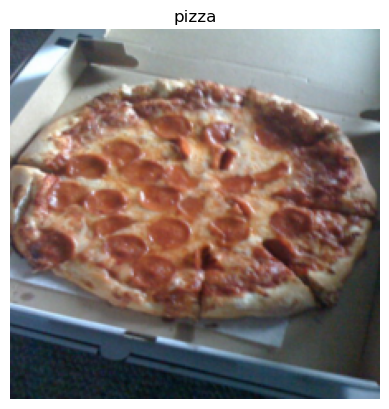

In [12]:
# View single image
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False);

we want to turn this image into patches of itself inline with Figure 1 of the ViT Paper.

How about we start by just visualizing the top row of patches pixels?

We can do this by indexing on the different image dimentions.

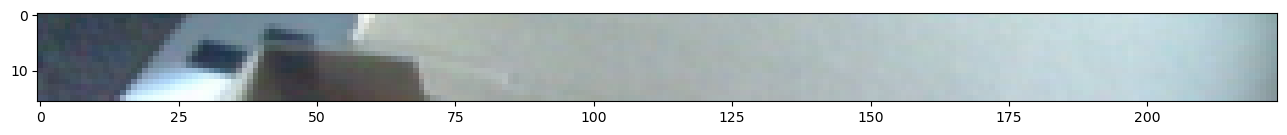

In [13]:
image_permuted = image.permute(1,2,0)

# index to plot the top row of patches pixels
patch_size = 16
plt.figure(figsize=(patch_size, patch_size))
plt.imshow(image_permuted[:patch_size, :, :]);

Now we've got the top row, let's turn it into patches.

We can do this by iterating through the number of patches there'd be in the top row.

Number of patches per row: 14.0
Patch size: 16 pixels x 16 pixels


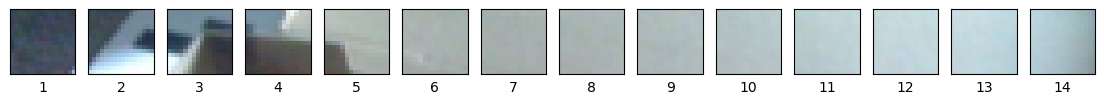

In [14]:
# setup hyperparameters and make sure img_size and patch_size are compatible

img_size = 224
patch_size = 16
number_of_patches = img_size / patch_size
assert img_size % patch_size ==0, "Image size must be divisible by patch size"
print(f"Number of patches per row: {number_of_patches}\nPatch size: {patch_size} pixels x {patch_size} pixels")

# create a series of subplots
fig, axs = plt.subplots(nrows=1,
                        ncols=img_size // patch_size,
                        figsize=(number_of_patches, number_of_patches),
                        sharex=True,
                        sharey=True)

# iterate through number of patches in the top row
for i, patch in enumerate(range(0, img_size, patch_size)):
    axs[i].imshow(image_permuted[:patch_size, patch:patch+patch_size, :]); # keep height index constant, alter the width index
    axs[i].set_xlabel(i+1) # set the label
    axs[i].set_xticks([])
    axs[i].set_yticks([])

Now lets do it for the whole image

Number of patches per row: 14.0        
Number of patches per column: 14.0        
Total patches: 196.0        
Patch size: 16 pixels x 16 pixels


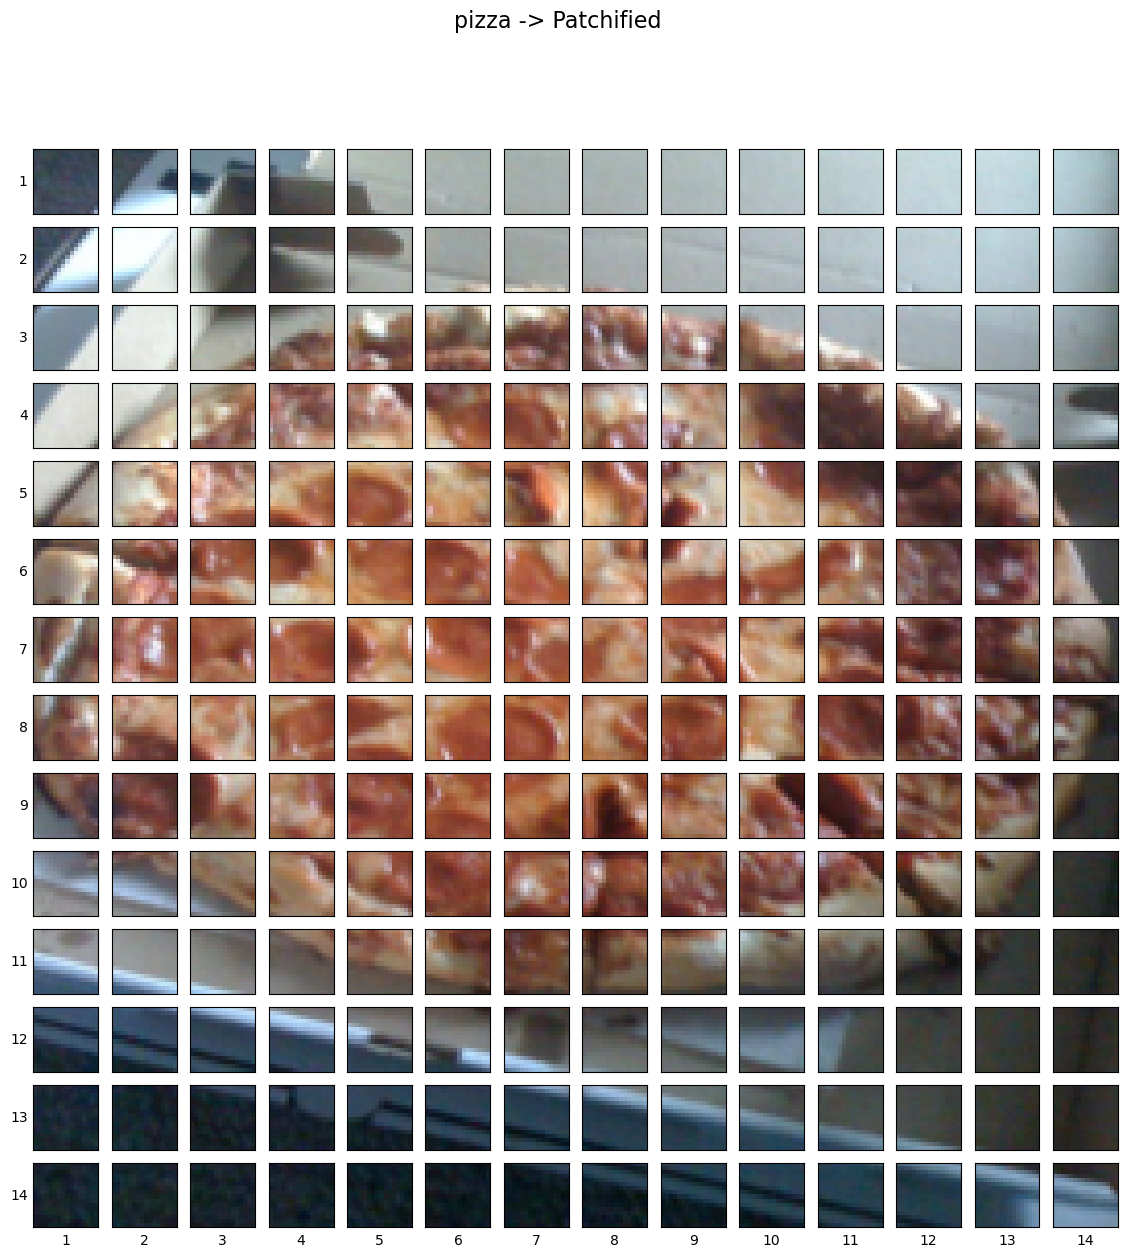

In [15]:
# Setup hyperparameters and make sure img_size and patch_size are compatible
img_size = 224
patch_size = 16
num_patches = img_size/patch_size
assert img_size % patch_size == 0, "Image size must be divisible by patch size"
print(f"Number of patches per row: {num_patches}\
        \nNumber of patches per column: {num_patches}\
        \nTotal patches: {num_patches*num_patches}\
        \nPatch size: {patch_size} pixels x {patch_size} pixels")

# Create a series of subplots
fig, axs = plt.subplots(nrows=img_size // patch_size, # need int not float
                        ncols=img_size // patch_size,
                        figsize=(num_patches, num_patches),
                        sharex=True,
                        sharey=True)

# Loop through height and width of image
for i, patch_height in enumerate(range(0, img_size, patch_size)): # iterate through height
    for j, patch_width in enumerate(range(0, img_size, patch_size)): # iterate through width

        # Plot the permuted image patch (image_permuted -> (Height, Width, Color Channels))
        axs[i, j].imshow(image_permuted[patch_height:patch_height+patch_size, # iterate through height
                                        patch_width:patch_width+patch_size, # iterate through width
                                        :]) # get all color channels

        # Set up label information, remove the ticks for clarity and set labels to outside
        axs[i, j].set_ylabel(i+1,
                             rotation="horizontal",
                             horizontalalignment="right",
                             verticalalignment="center")
        axs[i, j].set_xlabel(j+1)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].label_outer()

# Set a super title
fig.suptitle(f"{class_names[label]} -> Patchified", fontsize=16)
plt.show()

How how do we turn each of these pathes into an embedding and convert them into a sequence?

We can use PyTorch layers, `torch.nn.Conv2d()`

### 4.3 Creating image patches with `torch.nn.Conv2d()`

We've seen what an image looks like when it gets turned into patches, now let's start moving towards replicating the patch embedding layers with PyTorch.

To visualize our single image we wrote code to loop through the different height and width dimensions of a single image and plot individual patches.

This operation is very similar to the convolutional operation we saw in 03. PyTorch Computer Vision section 7.1: Stepping through nn.Conv2d().

In fact, the authors of the ViT paper mention in section 3.1 that the patch embedding is achievable with a convolutional neural network (CNN):

> **Hybrid Architecture**. As an alternative to raw image patches, the input sequence can be formed from feature maps of a CNN (LeCun et al., 1989). In this hybrid model, the patch embedding projection $\mathbf{E}$ (Eq. 1) is applied to patches extracted from a **CNN feature map**. As a special case, the patches can have spatial size $1 \times 1$, which means that the **input sequence is obtained by simply flattening the spatial dimensions of the feature map and projecting to the Transformer dimension**. The classification input embedding and position embeddings are added as described above.

The "**feature map**" they're refering to are the weights/activations produced by a convolutional layer passing over a given image.

![](08-vit-paper-patch-embedding-animation.gif)

By setting the `kernel_size` and `stride `parameters of a `torch.nn.Conv2d()` layer equal to the `patch_size`, we can effectively get a layer that splits our image into patches and creates a learnable embedding (referred to as a "Linear Projection" in the ViT paper) of each patch.

**Remember our ideal input and output shapes for the patch embedding layer?**

- **Input**: The image starts as 2D with size ${H \times W \times C}$.
- **Output**: The image gets converted to a 1D sequence of flattened 2D patches with size ${N \times\left(P^{2} \cdot C\right)}$.

**Or for an image size of 224 and patch size of 16:**

- **Input (2D image)**: (224, 224, 3) -> (height, width, color channels)
  
- **Output (flattened 2D patches)**: (196, 768) -> (number of patches, embedding dimension)

We can recreate these with:

- `torch.nn.Conv2d()` for turning our image into patches of CNN feature maps.
- `torch.nn.Flatten()` for flattening the spatial dimensions of the feature map.

Let's start with the `torch.nn.Conv2d(`) layer.

We can replicate the creation of patches by setting the `kernel_size` and `stride` equal to `patch_size`.

In [16]:
from torch import nn

# Set the patch size
patch_size=16

# Create the Conv2d layer with hyperparameters from the ViT paper
conv2d = nn.Conv2d(in_channels=3, # number of color channels
                   out_channels=768, # from Table 1: Hidden size D, this is the embedding size
                   kernel_size=patch_size, # could also use (patch_size, patch_size)
                   stride=patch_size,
                   padding=0)

This means each convolutional kernel will be of size `(patch_size x patch_size)` of if `patch_size=16, (16x16)` (the equivalent to the net patch)

And each step or `stride` of the convolutional kernel will be `patch_size` pixels long or 16 pixels long (equivalent of stepping to the next patch).

We'll set `in_channels=3` for the `number of color channels` in our image and we'll set `out_channels=768`, the same as the $D$ value in Table 1 for ViT-Base (this is the embedding dimension, each image will be embedded into a `learnable vector of size 768`).

Now we've got a convoluational layer, let's see what happens when we pass a single image through it.

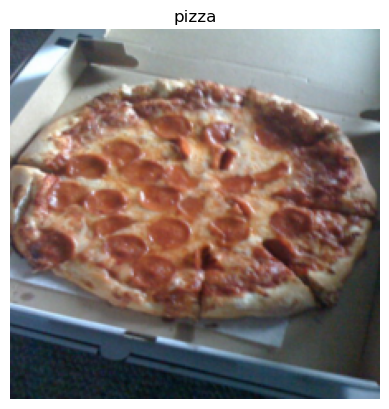

In [17]:
# View single image
plt.imshow(image.permute(1, 2, 0)) # adjust for matplotlib
plt.title(class_names[label])
plt.axis(False);

In [18]:
# Pass the image through the convolutional layer
image_out_of_conv = conv2d(image.unsqueeze(0)) # add a single batch dimension (height, width, color_channels) -> (batch, height, width, color_channels)
print(image_out_of_conv.shape)

torch.Size([1, 768, 14, 14])


Passing our image through the convolutional layer turns it into a series of 768 (this is the embedding size or $D$) feature/activation maps.

So its output shape can be read as:

```
torch.Size([1, 768, 14, 14]) -> [batch_size, embedding_dim, feature_map_height, feature_map_width]
```

Let's visualize five random feature maps and see what they look like.


Showing random convolutional feature maps from indexes: [88, 81, 634, 393, 469]


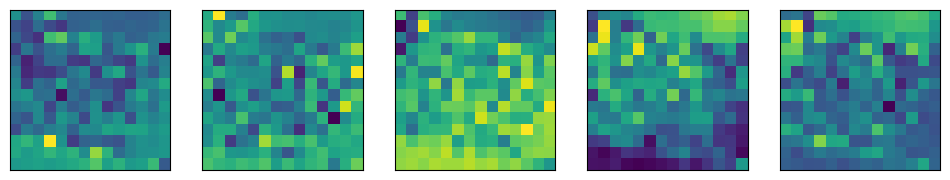

In [28]:
# Plot random 5 convolutional feature maps
import random
random_indexes = random.sample(range(0, 768), k=5) # pick 5 numbers between 0 and the embedding size
print(f"Showing random convolutional feature maps from indexes: {random_indexes}")

# Create plot
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12, 12))

# Plot random image feature maps
for i, idx in enumerate(random_indexes):
    image_conv_feature_map = image_out_of_conv[:, idx, :, :] # index on the output tensor of the convolutional layer
    axs[i].imshow(image_conv_feature_map.squeeze().detach().numpy())
    axs[i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[]);

Notice how the feature maps all kind of represent the original image, after visualizing a few more you can start to see the different major outlines and some major features.

**<div class='alert alert-success'>The important thing to note is that these features may change over time as the neural network learns.</div>**

And because of these, these feature maps can be considered a **learnable embedding** of our image.

Let's check out in numerical form.

In [37]:
# Get a single feature map in tensor form
single_feature_map = image_out_of_conv[:, 767, :, :]
single_feature_map, single_feature_map.requires_grad

(tensor([[[-7.0188e-02, -2.3895e-01,  6.8824e-03,  8.0299e-02, -5.7111e-02,
           -5.7727e-02, -6.3627e-02, -8.1827e-02, -8.8668e-02, -8.8985e-02,
           -1.0064e-01, -1.0720e-01, -1.0512e-01, -9.3265e-02],
          [-6.7372e-02, -1.8351e-01,  9.4658e-02, -6.7995e-03, -1.0653e-01,
           -7.3614e-02, -5.5584e-02, -5.4125e-02, -7.2828e-02, -8.5751e-02,
           -6.8312e-02, -7.6712e-02, -9.8782e-02, -7.9612e-02],
          [-1.1074e-01, -8.9280e-02,  6.1159e-02, -9.7927e-04, -1.0949e-01,
            1.7614e-01,  3.7457e-02,  4.6132e-02, -9.1110e-02,  4.8422e-02,
           -4.3436e-02, -5.2954e-02, -6.5070e-02, -5.7913e-02],
          [-1.6404e-01, -9.6637e-02,  2.8710e-02, -2.6516e-02, -1.0161e-01,
           -3.3699e-02,  1.4429e-01,  2.9065e-02,  5.2685e-02,  2.0518e-02,
            2.0554e-02, -1.9524e-02, -4.0904e-02, -5.8673e-03],
          [ 7.1231e-03, -3.1504e-02,  1.5542e-01, -2.4377e-02,  5.3137e-02,
            5.3723e-02,  1.1470e-01, -2.5788e-02, -9.1306e-0

The `grad_fn` output of the `single_feature_map` and the `requires_grad=True `attribute means PyTorch is tracking the gradients of this feature map and it will be updated by gradient descent during training.

### 4.4 Flattening the patch embedding with `torch.nn.Flatten()`

We've turned our image into patch embeddings but they're still in 2D format.

How do we get them into the desired output shape of the patch embedding alyers of the ViT model?

**Desired Output (1D sequence of flattened 2D patches)**: (196,768) -> (number of patches, embedding dimensions) -> $N \times \left(P^{2} \cdot C\right)$

Let's check the currect shape.

In [42]:
# current tensor shape

print(f'Current tensor shape:\n{image_out_of_conv.shape} -> [batch, embedding_dim, feature_map_height, feature_map_width]')

Current tensor shape:
torch.Size([1, 768, 14, 14]) -> [batch, embedding_dim, feature_map_height, feature_map_width]


Well we've got the 768 part ( $(P^{2} \cdot C)$ ) but we still need the number of patches ($N$).

Reading back through section 3.1 of the ViT paper it says:

> As a special case, the patches can have spatial size $1 \times 1$, which means that the input sequence is obtained by simply flattening the spatial dimensions of the feature map and projecting to the Transformer dimension.


**Flattening the spatial dimensions of the feature map key?** 😦

**What layer do we have in PyTorch that can flatten? 🤯**

How about `torch.nn.Flatten()?` 😍

But we don't want to flatten the whole tensor, we only want to flatten the `spatial dimensions of the feature map`

Which in our case is the `feature_map_height` and `feature_map_width` dimensions of `image_out_of_conv`

So how about we create a `torch.nn.Flatten()` layer to only flatten dimension, we can use the `start_dim` and `end_dim` parameters to set that up.

In [43]:
# create flatten layer

flatten = nn.Flatten(start_dim=2,  # flatten feature_map_height (dimension 2)
                     end_dim=3) # flatten feature_map_width (dimension 3)

---

Nice! Now let's put it all together.

We'll:
1. Take a single image.
2. Put in through the `convolutional layer(conv2d) to turn the image into 2D feature maps` <- `patch embeddings`
3. `Flatten` the 2D feature map `into a single sequence`.

Original image shape: torch.Size([3, 224, 224])
Image feature map shape: torch.Size([1, 768, 14, 14])
Flattened image feature map shape: torch.Size([1, 768, 196])


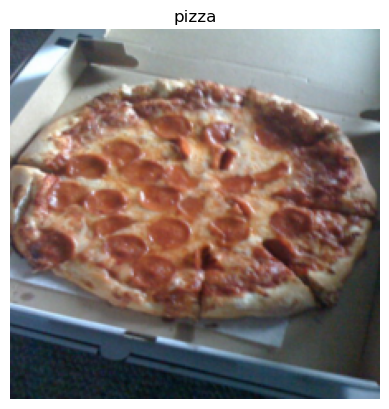

In [48]:
# 1. View single image
plt.imshow(image.permute(1,2,0))
plt.axis(False)
plt.title(class_names[label])
print(f"Original image shape: {image.shape}")

# 2. Turn image into feature maps
image_out_of_conv = conv2d(image.unsqueeze(0)) # add batch dimension to avoid error
print(f"Image feature map shape: {image_out_of_conv.shape}")

# 2. Flatten the feature maps
image_out_of_conv_flattened = flatten(image_out_of_conv)
print(f"Flattened image feature map shape: {image_out_of_conv_flattened.shape}")


Woohoo! It looks like our image_out_of_conv_flattened shape is very close to our desired output shape:

- **Desired output** (flattened 2D patches): (196, 768) -> ${N \times\left(P^{2} \cdot C\right)}$
- **Current shape**: (1, 768, 196)

The only difference is our current shape has a batch size and the dimensions are in a different order to the desired output.

**How to fix this?**
- By rearranging the dimensions.

We can rearrange the dimension using `torch.tensor.permute()` function just like we did to plot with matplotlib.

Let's try.

In [52]:
# get flattened image path embeddings in right shape
image_out_of_conv_flattened_reshaped = image_out_of_conv_flattened.permute(0,2,1)
print(f"Patch embedding sequence shape: {image_out_of_conv_flattened_reshaped.shape} -> [batch_size, num_patches, embedding_size]")

Patch embedding sequence shape: torch.Size([1, 196, 768]) -> [batch_size, num_patches, embedding_size]


Great, we've now matched the desired input and output shapes for the patch embedding layer of the ViT architecture using a couple of PyTorch layers.

Let's visualize one of the flattened feature maps.

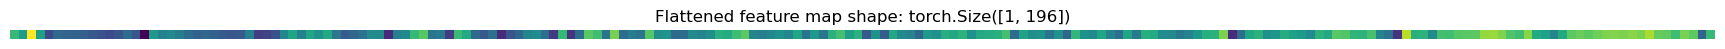

In [59]:
# get a single flattened feature map
single_flattened_feature_map = image_out_of_conv_flattened_reshaped[:,:,0]

# pot the flattened feature map visually
plt.figure(figsize=(22,22))
plt.imshow(single_flattened_feature_map.detach().numpy())
plt.title(f"Flattened feature map shape: {single_flattened_feature_map.shape}")
plt.axis(False);

Hmm, the flattened feature map doesn't look like much visually, but that's not what we're concerned about, this is what will be the output of the patching embedding layer and the input to the rest of the ViT architecture.

> **Note**: The original Transformer architecture was designed to work with text. The Vision Transformer architecture (ViT) had the goal of using the original Transformer for images. This is why the input to the ViT architecture is processed in the way it is. **`We're essentially taking a 2D image and formatting it so it appears as a 1D sequence of text`**.

In [60]:
# See the flattened feature map as a tensor
single_flattened_feature_map, single_flattened_feature_map.requires_grad, single_flattened_feature_map.shape

(tensor([[-0.1077, -0.1816,  0.0997, -0.1715, -0.3920, -0.3143, -0.3248, -0.3291,
          -0.3385, -0.3568, -0.3726, -0.3887, -0.3681, -0.3101, -0.3605, -0.5308,
          -0.1896, -0.2548, -0.2334, -0.2651, -0.3050, -0.3319, -0.3227, -0.3318,
          -0.3532, -0.3642, -0.3536, -0.2540, -0.4147, -0.4095, -0.3726, -0.2359,
          -0.1607, -0.2560, -0.1566, -0.2120, -0.1490, -0.2806, -0.3501, -0.3208,
          -0.2955, -0.2274, -0.2307, -0.4536, -0.2601, -0.2288, -0.1074, -0.0645,
          -0.2847, -0.2694, -0.4189, -0.1006, -0.1456, -0.3157, -0.3581, -0.2979,
          -0.4569, -0.3636, -0.3180, -0.2432, -0.2233, -0.3014, -0.4229, -0.1089,
          -0.4358, -0.3022, -0.0612, -0.0925, -0.2891, -0.0301, -0.3100, -0.2640,
          -0.2919, -0.0663, -0.2224, -0.2055, -0.3122, -0.3032, -0.2305, -0.2477,
          -0.2165, -0.1302, -0.1426, -0.0955, -0.0599, -0.2449, -0.2616, -0.2391,
          -0.2100, -0.2367, -0.1587, -0.2916, -0.1924, -0.2859, -0.1318, -0.0886,
          -0.174

Beautiful!

We've turned our single 2D image into a 1D learnable embedding vector (or "Linear Projection of Flattned Patches" in Figure 1 of the ViT paper).

### 4.5. Turning the ViT patch embedding layer into a PyTorch module

Time to put everything we've done for creating the patch embedding into a single PyTorch layer.

We can do so by subclassing `nn.Module` and creating a small PyTorch 'model' to do all of the steps above.

Specifically we'll:
1. Create a class called `PathEmbedding` with subclasses `nn.Module` - so it can be used as a PyTorch layer
2. Initialize the class with the parameters `in_channels=3`, `patch_size=16` (for ViT-Base) and `embedding_dim=768` (this is $D$ for ViT-Base from Table 1.
3. Create a layer to turn an image into patches using `nn.Conv2d()` - just like 4.3 above.
4. Create a layer to flatten the patch feature maps into a single dimension (just like 4.4 above)
5. Define a `forward()` method to take an input and pass it through the layers created in 3 and 4.
6. make sure the output shape reflects the required output shape of the ViT architecture ($N\times\left(P^{2} \cdot C)\right)$

In [73]:
# 1. Create a class that subclasses nn.Module
class PatchEmbedding(nn.Module):
    """Turns a 2D input image into a 1D sequence learnable embedding vector.

    Args:
        in_channels (int): Number of color channels for the input images. Defaults to 3.
        patch_size (int): Size of patches to convert input image into. Defaults to 16.
        embedding_dim (int): Size of embedding to turn image into. Defaults to 768.
    """
    # 2. Initialize the class with appropriate parameters
    def __init__(self,
                 in_channels:int=3,
                 patch_size:int=16,
                 embedding_dim:int=768):
        super().__init__()

        # 3. create a lauyer to turn the image into patches
        self.patcher = nn.Conv2d(in_channels=in_channels,
                                out_channels=embedding_dim,
                                kernel_size=patch_size,
                                stride=patch_size,
                                padding=0)
        self.flatten = nn.Flatten(start_dim=2,
                                 end_dim=3)
    def forward(self, x):
        # check if the inputs are in a correct shape
        image_resolution = x.shape[-1]               
        assert image_resolution % patch_size == 0, f"Input image size must be divisble by patch size, image shape: {image_resolution}, patch size: {patch_size}"

        # perform the forward pass
        x_patched = self.patcher(x)
        x_flattened = self.flatten(x_patched)

        # 6. Make sure the output shape has the current order
        return x_flattened.permute(0, 2, 1) # adjust so the embedding is on the final dimension [batch_size, P^2•C, N] -> [batch_size, N, P^2•C]

Let's try it out on a single image.
-

In [74]:
set_seeds()

# create an instance of patch embedding layer
patchify = PatchEmbedding(in_channels=3, 
                         patch_size=15, 
                         embedding_dim=768)

# pass a single image through
print(f'Input image shape: {image.unsqueeze(0).shape}')
patch_embedded_image = patchify(image.unsqueeze(0)) # add extra bach dimension
print(f'Output patch embedding shape: {patch_embedded_image.shape}')

Input image shape: torch.Size([1, 3, 224, 224])
Output patch embedding shape: torch.Size([1, 196, 768])


Great!!🔥

The output shape matches the ideal input and output shapes we'd like to see from the patch embedding layer:

- **Input**: The image starts as 2D with size ${H \times W \times C}$.
- **Output**: The image gets converted to a 1D sequence of flattened 2D patches with size ${N \times\left(P^{2} \cdot C\right)}$.

Where:
- $(H, W)$ is the resolution of the original image.
- $C$ is the number of channels.
- $(P, P)$ is the resolution of each image patch (patch size).
- $N=H W / P^{2}$ is the resulting number of patches, which also serves as the effective input sequence length for the Transformer.

We've now replicated the patch embedding for equation 1 but not the class token/position embedding.

We'll get to that later on.
![](08-vit-paper-replicating-the-patch-embedding-layer.png)

Our `PatchEmbedding` class (right) replicates the patch embedding of the ViT architecture from Figure 1 and equation 1 from the ViT paper (left). However, `the learnable class embedding and position embeddings haven't been created yet`. These will come soon.

Let's now get a summary of our `PathEmbedding` layer.

In [75]:
from torchinfo import summary

# create random input sizes
random_input_image = (1,3, 224,224)
random_input_image_error = (1,3, 250,250) # will error because the image size doesn't match

# # Get a summary of the input and outputs of PatchEmbedding (uncomment for full output)
summary(PatchEmbedding(),
        input_size=random_input_image, # try swapping this for "random_input_image_error"
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
PatchEmbedding (PatchEmbedding)          [1, 3, 224, 224]     [1, 196, 768]        --                   True
├─Conv2d (patcher)                       [1, 3, 224, 224]     [1, 768, 14, 14]     590,592              True
├─Flatten (flatten)                      [1, 768, 14, 14]     [1, 768, 196]        --                   --
Total params: 590,592
Trainable params: 590,592
Non-trainable params: 0
Total mult-adds (M): 115.76
Input size (MB): 0.60
Forward/backward pass size (MB): 1.20
Params size (MB): 2.36
Estimated Total Size (MB): 4.17

### 4.6. Creating the class token embedding

`after` the image `patch embedding`, we need to create `class token embedding`.

or $\mathbf{x}_\text {class }$ from equation 1.

![](08-vit-paper-equation-1-the-class-token.png)

*Left*: Figure 1 from the ViT paper with the `classification token` or [class] embedding token we're going to recreate highlighted.

*Right*: Equation 1 and section 3.1 of the ViT paper that relate to the learnable class embedding token.


Reading the second paragraph of section 3.1 from the ViT paper, we see the following description

> Similear to BERT's `[class]` token, we prepend a learnable embedding to the sequence of embedded patches $\left(\mathbf{z}_{0}^{0}=\mathbf{x}_{\text {class }}\right)$, whose state at the output of the Transformer encoder $\left(\mathbf{z}_{L}^{0}\right)$ serves as the image representation $\mathbf{y}$ (Eq. 4).

> *Note*: BERT (Bidirectional Encoder Representations from Transformers) is one of the original machine learning research papers to use the Transformer architecture to achieve outstanding results on natural language processing (NLP) tasks and is where the idea of having a [ class ] token at the start of a sequence originated, class being a description for the "classification" class the sequence belonged to.

So we need to `prepend a learnable embedding to the sequence of embedded patches`

Let's start by viewing our sequence of embedded patches tensor and its shape.

In [79]:
# View the patch embedding and patch embedding shape
print(patch_embedded_image)
print(f"Patch embedding shape: {patch_embedded_image.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[-0.3604,  0.1100, -0.0459,  ...,  0.0077, -0.1667, -0.0708],
         [-0.6190,  0.1500, -0.1618,  ...,  0.0883, -0.1455,  0.0672],
         [-0.4996,  0.3919,  0.0174,  ..., -0.1196, -0.3698,  0.1018],
         ...,
         [-0.4614,  0.0935,  0.0077,  ...,  0.0086, -0.1960, -0.0026],
         [-0.3652,  0.2346, -0.1405,  ..., -0.0009, -0.2282, -0.0268],
         [-0.2310,  0.1212, -0.0587,  ...,  0.0074, -0.0926, -0.0154]]],
       grad_fn=<PermuteBackward0>)
Patch embedding shape: torch.Size([1, 196, 768]) -> [batch_size, number_of_patches, embedding_dimension]


To "prepend a learnable embedding to the sequence of embedded patches" we need to create a learnable embedding in the shape of the `embedding_dimension` ($D$) and then add it to the `number_of_patches` dimension

Or in pseudocode:
```
patch_embedding = [image_patch_1, image_patch_2, image_patch_3...]
class_token = learnable_embedding
patch_embedding_with_class_token = torch.cat((class_token, patch_embedding), dim=1)
```

Notice the concatenation (`torch.cat()`) happens on `dim=1` (the `number_of_patches` dimension).

Let's create a learnable embedding for the class token.

To do so, we'll get the batch size and embedding dimension shape and then we'll create a `torch.ones()` tensor in the shape `[batch_size, 1, embedding_dimension]`.

And we'll make the tensor learnable by passing it to `nn.Parameter()` with `requires_grad=True`.

In [87]:
# get the batch size and embedding dimension
batch_size = patch_embedded_image.shape[0]
embedding_dimension = patch_embedded_image.shape[2]

# create the class token embedding as a learnable parameter that shares the same size as the embedding dimension (D)
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension),
                           requires_grad=True) # making embedding learnable

# show the first 10 examples of the class token
print(class_token[:,:,:10])

# print the class token shape
print(f"Class token shape: {class_token.shape} -> [batch_size, number_of_tokens, embedding_dimension]")

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<SliceBackward0>)
Class token shape: torch.Size([1, 1, 768]) -> [batch_size, number_of_tokens, embedding_dimension]


> **Note**: Here we're only creating the class token embedding as `torch.ones()` for demonstration purposes, in reality, you'd likely create the class token embedding with `torch.randn()` (since machine learning is all about harnessing the power of controlled randomness, you generally start with a random number and improve it over time)

See how the `number_of_tokens` dimension of `class_token` is `1` since we only want to prepend one class token value to the start of the patch embedding sequence.

Now we've got the class token embedding, let's prepend it to our sequence of image patches `patch_embedded_image`

We can do so using `torch.cat()` and set `dim=1` (so `class_token`'s `number_of_tokens` dimension is prepended to `patch_embedded_image`'s `number_of_patches` dimension)

In [88]:
# Add the class token embedding to the front of the patch embedding
patch_embedded_image_with_class_embedding = torch.cat((class_token, patch_embedded_image),
                                                      dim=1) # concat on first dimension

# Print the sequence of patch embeddings with the prepended class token embedding
print(patch_embedded_image_with_class_embedding)
print(f"Sequence of patch embeddings with class token prepended shape: {patch_embedded_image_with_class_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[ 1.0000e+00,  1.0000e+00,  1.0000e+00,  ...,  1.0000e+00,
           1.0000e+00,  1.0000e+00],
         [-3.6040e-01,  1.1005e-01, -4.5942e-02,  ...,  7.7061e-03,
          -1.6666e-01, -7.0768e-02],
         [-6.1904e-01,  1.5003e-01, -1.6184e-01,  ...,  8.8274e-02,
          -1.4549e-01,  6.7214e-02],
         ...,
         [-4.6140e-01,  9.3485e-02,  7.6853e-03,  ...,  8.6020e-03,
          -1.9602e-01, -2.6315e-03],
         [-3.6522e-01,  2.3456e-01, -1.4052e-01,  ..., -9.2227e-04,
          -2.2821e-01, -2.6848e-02],
         [-2.3101e-01,  1.2118e-01, -5.8691e-02,  ...,  7.4111e-03,
          -9.2600e-02, -1.5374e-02]]], grad_fn=<CatBackward0>)
Sequence of patch embeddings with class token prepended shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


Sweet! Learnable class token prepended!
-
![](08-vit-paper-equation-1-prepending-the-learnable-class-token.png)

*Reviewing what we've done to create the learnable class token, we start with a sequence of image patch embeddings created by `PatchEmbedding()` on single image, we then created a learnable class token with one value for each of the embedding dimensions and then prepended it to the original sequence of patch embeddings.*

***Note**: Using `torch.ones()` to create the learnable class token is mostly for demonstration purposes only, in practice, you'd likely create it with `torch.randn()`.*

### 4.7 Creating the position embedding

We've already got:
1. Class token embedding
2. Patch embedding

Let's create the position embedding now.

Or $\mathbf{E}_{\text {pos }}$ from equation 1 where $E$ stands for "embedding".

![](08-vit-paper-equation-1-the-position-embeddings.png)

*Left: Figure 1 from the ViT paper with the position embedding we're going to recreate highlighted.*

*Right: Equation 1 and section 3.1 of the ViT paper that relate to the position embedding*

Let's find our more about by reading section 3.1 of the ViT paper.
> **Position embeddings** are added to the patch embeddings to retain positional information. We use **standard learnable 1D position embeddings**, since we have not observed significant performance gains from using more advanced 2D-aware position embeddings (Appendix D.4). The resulting sequence of embedding vectors serves as input to the encoder.

By `retain positional information` the authors mean they want the architecture to know what `order` the patches comes in. As in, patch two comes after the patch one and pathch three comes after the patch two and so on.

The positional information can be important when considering what's in an image (without positional information and a flattened sequence could be seen as having no order and thus no patch relates to any other patch)

To start creating the position embeddings, let's view our current embedding.

In [89]:
# View the sequence of patch embeddings with the prepensed class embedding
patch_embedded_image_with_class_embedding, patch_embedded_image_with_class_embedding.shape

(tensor([[[ 1.0000e+00,  1.0000e+00,  1.0000e+00,  ...,  1.0000e+00,
            1.0000e+00,  1.0000e+00],
          [-3.6040e-01,  1.1005e-01, -4.5942e-02,  ...,  7.7061e-03,
           -1.6666e-01, -7.0768e-02],
          [-6.1904e-01,  1.5003e-01, -1.6184e-01,  ...,  8.8274e-02,
           -1.4549e-01,  6.7214e-02],
          ...,
          [-4.6140e-01,  9.3485e-02,  7.6853e-03,  ...,  8.6020e-03,
           -1.9602e-01, -2.6315e-03],
          [-3.6522e-01,  2.3456e-01, -1.4052e-01,  ..., -9.2227e-04,
           -2.2821e-01, -2.6848e-02],
          [-2.3101e-01,  1.2118e-01, -5.8691e-02,  ...,  7.4111e-03,
           -9.2600e-02, -1.5374e-02]]], grad_fn=<CatBackward0>),
 torch.Size([1, 197, 768]))

Equation 1 states that the position embeddings ($\mathbf{E}_{\text {pos }}$) should have the shape $(N + 1) \times D$:

$$\mathbf{E}_{\text {pos }} \in \mathbb{R}^{(N+1) \times D}$$

Where:

- $N=H W / P^{2}$ is the resulting number of patches, which also serves as the effective input sequence length for the Transformer (number of patches).
- $D$ is the size of the patch embeddings, different values for $D$ can be found in Table 1 (embedding dimension).

Luckily we've got both of these values already.

So let's make a learnable 1D embedding with `torch.ones()` to create $\mathbf{E}_{\text {pos }}$.
-

In [93]:
# calculate N
number_of_patches = int((height*width) / patch_size**2)

# get embededing dimension
embedding_dimension = patch_embedded_image_with_class_embedding.shape[2]

# create the learnable 1D position embedding
position_embedding = nn.Parameter(torch.ones(1, 
                                             number_of_patches+1, 
                                             embedding_dimension),
                                  requires_grad=True)

# show the first 10 sequences and 10 position embedding value and check the 
# shape of the postion embedding
print(position_embedding[:,:10,:10])
print(f"Position embeddding shape: {position_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")


tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<SliceBackward0>)
Position embeddding shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


Position embedding created!

Let's add them to our sequence of patch embeddings with a prepended class token.

In [94]:
# Add the position embedding to the patch and class token embedding
patch_and_position_embedding = patch_embedded_image_with_class_embedding + position_embedding

print(patch_and_position_embedding)
print(f"Patch embeddings, class token prepended and positional embeddings added shape: {patch_and_position_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
         [0.6396, 1.1100, 0.9541,  ..., 1.0077, 0.8333, 0.9292],
         [0.3810, 1.1500, 0.8382,  ..., 1.0883, 0.8545, 1.0672],
         ...,
         [0.5386, 1.0935, 1.0077,  ..., 1.0086, 0.8040, 0.9974],
         [0.6348, 1.2346, 0.8595,  ..., 0.9991, 0.7718, 0.9732],
         [0.7690, 1.1212, 0.9413,  ..., 1.0074, 0.9074, 0.9846]]],
       grad_fn=<AddBackward0>)
Patch embeddings, class token prepended and positional embeddings added shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


Notice how the values of each of the elements in the embedding tensor `increases by 1` (this is because of the position embeddings being created with `torch.ones()`).

**Note**: We could put both the class token embedding and position embedding into their `own layer` if we wanted to. But we'll see later on in `section 8` how they can be incorporated into the overall ViT architecture's `forward()` method.

![](08-vit-paper-equation-1-patch-embeddings-with-learnable-class-token-and-position-embeddings)

*The workflow we've used for adding the position embeddings to the sequence of patch embeddings and class token.*

***Note**: `torch.ones()` only used to create embeddings for illustration purposes, in practice, you'd likely use `torch.randn()` to start with a random number.*

### 4.8 Putting it all together: From image to embedding

Alright, we've come a long way in terms of turning our input images into an embedding and replicating equation 1 from section 3.1 of the ViT paper. 

$$ \begin{aligned} \mathbf{z}_{0} &=\left[\mathbf{x}_{\text {class }} ; \mathbf{x}_{p}^{1} \mathbf{E} ; \mathbf{x}_{p}^{2} \mathbf{E} ; \cdots ; \mathbf{x}_{p}^{N} \mathbf{E}\right]+\mathbf{E}_{\text {pos }}, & & \mathbf{E} \in \mathbb{R}^{\left(P^{2} \cdot C\right) \times D}, \mathbf{E}_{\text {pos }} \in \mathbb{R}^{(N+1) \times D} \end{aligned} $$

Let's now put everything together in a single code cell and go from input image ($\mathbf{x}$) to output embedding ($\mathbf{z}_0$).
-

We can do so by:
1. Setting the patch size.
2. Getting a single image.
3. Adding a batch dimension to the single image so that it is compatible with our `PatchEmbedding` layer.
4. Creating a `PatchEmbedding` layer with a `patch_size=16` and `embedding_dim=760`
5. Passing the single image through the `PatchEmbedding` layer in $4$ to create a sequence of patch embeddings.
6. Creating a class token embedding like in section 4.6.
7. Prepending the class token embedding to the patch embeddings created in step $5$.
8. Creating a position embedding like in section 4.7.
9. Adding the position embedding to the class token and patch embeddings created in step 7.

We'll also make sure to set the random seeds with `set_seeds()` and print out the shapes of different tensors along the way.

In [109]:
set_seeds()

# 1. Set patch size
patch_size = 16

# 2. Print shape of original image tensor and get the image dimension
print(f'Image tensor shape: {image.shape}')
height, width = image.shape[1], image.shape[2]

# 3. Get image tensor and add batch dimension
x = image.unsqueeze(0) # add a batch dimension
print(f'Input image with batch dimension shape: {x.shape}')

# 4. Create patch embedding layer
patch_embedding_layer = PatchEmbedding(in_channels=3,
                                       patch_size=patch_size,
                                       embedding_dim=768)
# 5. Pass image through patch embedding layer
patch_embedding = patch_embedding_layer(x)
print(f'Patching embedding shape: {patch_embedding.shape}')

# 6. Create class token embedding
batch_size = patch_embedding.shape[0]
embedding_dimension = patch_embedding.shape[-1]
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension),
                           requires_grad=True)
print(f'Class token embedding shape: {class_token.shape}')

# 7. Prepend class token embedding to patch embedding
patch_embedding_class_token = torch.cat((class_token, patch_embedding), dim=1)
print(f'Patch embedding with class token shape: {patch_embedding_class_token.shape}')

# 8. Create position embedding
number_of_patches = int((height*width) / patch_size**2)
position_embedding = nn.Parameter(torch.ones(1, number_of_patches+1, embedding_dimension),
                                  requires_grad=True) 

# 9. Add position embedding to patch embedding with class token
patch_and_position_embedding = patch_embedding_class_token + position_embedding
print(f'Patch and position embedding shape: {patch_and_position_embedding.shape}')



Image tensor shape: torch.Size([3, 224, 224])
Input image with batch dimension shape: torch.Size([1, 3, 224, 224])
Patching embedding shape: torch.Size([1, 196, 768])
Class token embedding shape: torch.Size([1, 1, 768])
Patch embedding with class token shape: torch.Size([1, 197, 768])
Patch and position embedding shape: torch.Size([1, 197, 768])


Great 🎉

We just went from *`Single Image (x)`* to *`Patch and Position Embeddings (Z0)`* in a single cell of code.
![](08-vit-paper-equation-1-putting-it-all-together.png)
***Mapping equation 1 from the ViT paper to our PyTorch code.***

***This is the essence of paper replicating, taking a research paper and turning it into usable code***

---

Now we've got a way to encode our images and pass them to the `Transformer Encoder` in Figure 1 of the ViT paper.

![](08-vit-paper-architecture-animation-full-architecture.gif)

*Animating the entire ViT workflow: `from patch embedding to transfer encoder to MLP head`

---

From a code perspective, creating the patch embedding is probably the largest section of replicating the ViT paper.

Many of the other parts of the ViT paper such as the `Multi-Head Attention` and `Norm Layers` can be created using existing PyTorch layers.
-

## 5. Equation 2: Multi-Head Attention(MSA)

To start, we'll break down the Transformer Encoder section into two parts (start small and increase when necessary)

The first being equation 2 and the second being equation 3.

**Recall equation 2 states:**

$$ \begin{aligned} \mathbf{z}_{\ell}^{\prime} &=\operatorname{MSA}\left(\operatorname{LN}\left(\mathbf{z}_{\ell-1}\right)\right)+\mathbf{z}_{\ell-1}, & & \ell=1 \ldots L \end{aligned} $$

This indicates a `Multi-Head Attention (MSA)` layer wrapped in a `LayerNorm(LN)` layer with a residual connection (the input to the layer gets added to the output of the layer)

We'll refer to this equation 2 as the `MSA block`
![](08-vit-paper-equation-2-msa-block-mapped-to-equation.png)

***Left:** Figure 1 from the ViT paper with `Multi-Head Attention` and `Norm Layers` as well as the `residual connection (+)` highlighted within  the `Transformer Encoder` block.*

***Right:** Mapping the `Multi-Head Self Attention (MSA)` layer, `Norm layer` and `residual connection` to their respective parts of equation 2 in ViT paper.*

---

<div class='alert alert-success'>
    
**Many layers you find in research papers are already implemented in modern deep learning frameworks such as PyTorch.**
    
</div>

In  saying this, to replicate these layers and residual connection with PyTorch code we can use:

- **Multi-Head Self Attention (MSA)** - `torch.nn.MultiheadAttention()`
- **Norm(LN or LayerNorm)** - `torch.nn.LayerNorm()`
- **Residual connection** - add the input to tht output (we'll se this later on when we create the full Transformer Encoder block in `section 7.1`)

### 5.1 The LayerNorm(LN) layer

[Layer Normalization](https://paperswithcode.com/method/layer-normalization) (`torch.nn.LayerNorm()`) or Norm or LayerNorm or LN) normalizes an input over the last dimension.

You can find the formal definition of `torch.nn.LayerNorm()` in the [PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html)

PyTorch's `torch.nn.LayerNorm()`'s main parameter is `normalized_shape` which can set to be equal to the dimensionsize we'd like to normalize over (in our case it'll be $D$ or `768` for ViT-Base)

We can think of any kind of normalization as 'getting the data into a similar format' or 'getting data samples into a similar distribution'

Imagine walking up (or down) of stairs all with  different heights and lengths.

It would not help you if you figure out how to climb one step, the other step will be different and you need another set of skills to figure that one out.

`Normalization` (inluding `Layer Normalization`) is equivalent of making all the stars the same height and length so that it would be easy for you to learn and navigate.

So just like you can walk up (or down) stairs with similar heights and lengths much easier than those with unequal heights and widths, `neural networks can optimize over data samples with similar distributions` (similar mean and standard-deviation) easier than those with varying distributions

`Similar Distribution` -> `similar mean and standard-deviation`


### 5.2. The Multi-Head Self Attention (MSA) layer

The power of the self-attention and multi-head attention (self-attention applied multiple times) were revealed in the form of the original Transformer Architecture introduced in the *[Attention is all you need](https://arxiv.org/abs/1706.03762)* research paper.

Originally designed for text inputs, the `original self-attention` mechanism `takes a sequence of words` and then `calculates` which `word should pay more attention` to another word.
-

In other words, in the sentence `the dog jumped over the fence` perhaps the word `dog` relates strongly to `jumped` and `fence`.

This is simplified but the premise remains the same for images.

Since our input is a sequence of image patches rather than words, self-aatention and in turn multi-head attention will calculate which patch of an image is most related to another patch, eventually forming a learned representation of an image.

But what's most important is that the layer does this on it's own given the data - meaning we don't tell it what patterns to learn).

And if the learned representation that the layer formed using `MSA` are good, we'll see the results in our model's performance.

There are many resources online to learn more about the Transformer architecture and attention mechanism such as Jay Allammar's wonderful *[Illustrated Transformer Post](https://jalammar.github.io/illustrated-transformer/)* and *[Illustrated Attention Post](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/)*

We're going to focus more on coding an existing PyTorch MSA implementation than creating our own.

However, you can find the formal definition of the ViT paper's MSA implementation dfined in Appendix A:
![](08-vit-paper-equation-2-appendix-A.png)

***Left**: Vision Transformer architecture overview from Figure 1 of the ViT paper*

***Right**: Definitions of equation 2, section 3.1 and Appendix A of the ViT paper highlighted to reflect their respective parts in Figure 1.*

The image above highlights the triple embedding input to the MSA layer.

This is known as **query**, **key**, **value** input or **qkv** for short which is fundamental to the self-attention mechanism.

In our case, the triple embedding input will b     tgite three version of the output of the `Norm Layer` - `one for query, key, and value`

or Three versions of our layer-normalized image patch and position embeddings created in `section 4.8`

We can implement the MSA layer in PyTorch with `torch.nn.MultiheadAttention()` with the parameters:
- `embed_dim` - the embedding dimension from Table 1 (Hidden size $D$)
- `num_heads` - how many attention heads to use (this is where the term `multihead` comes from), this value is also in Table 1 (Heads)
- `dropout` - whether or not to apply dropout to the attention layer (according to Appendix B.1, dropout isn't used after the `qkv-projections)
- `batch_first`  - does our batch dimension come first? (yes it does)

### 5.3 Replicating equation 2 with PyTorch layers

Let's put everything we've discussed about `LayerNorm (LN)` and `Multi-Head Attention(MSA)` layers in equation 2 into practice.

To do so we'll:
1. Create a class called `MultiheadSelfAttentionBlock` that inhertis from `torch.nn.Module`
2. Initialize the class with hyperparameters from Table 1 of the ViT paper for the ViT-Base model.
3. Create a layer normalization (LN) layer with `torch.nn.LayerNorm()` with the `normalized_shape` parameter the same as our embedding dimension ($D$ from Table 1)
4. Create a `forward()` method for our class passing in the inputs through the LN layer and MSA layer.

In [110]:
# 1. Create a class that inherits from nn.Module
class MultiheadSelfAttentionBlock(nn.Module):
    """Creates a multi-head self-attention block ('MSA block' for short).
    """
    # 2. Initialize the lass with hyperparameters from Table 1
    def __init__(self,
                 embedding_dim:int=768, # hidden size D from Table 1 for ViT-Base
                 num_heads:int=12, # heads from Table 1 for ViT-Base
                 attn_dropout:float=0): # doesn't look like the paper uses any dropout in MSABlocks
        super().__init__()

        # 3. Create the LayerNorm Layer(LN)
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

        # 4. Create the Multi-Head Attention (MSA) layer
        self.multihead_attn = nn.MultiheadAttention(embed_dim=embedding_dim,
                                                   num_heads=num_heads,
                                                   dropout=attn_dropout,
                                                   batch_first=True) # does our batch dimension come first?


    # 5. Create a forward() method to pass the data through layers
    def forward(self, x):
        x = self.layer_norm(x)
        attn_output, _ = self.multihead_attn(query=x, # query embeddings
                                            key=x, # key embeddings
                                            value=x, # value embeddings
                                            need_weights=False) # do we need the weights or just the layer outputs?

        return attn_output

***Note**: Unlike Figure 1, our `MultiheadSelfAttentionBlock` doesn't include a skip or residual connection ("$+\mathbf{z}_{\ell-1}$" in equation 2), we'll include this when we create the entire Transformer Encoder later on in section 7.1.*

MSABlock created!

Let's try it out by creating an instance of our `MultiheadSelfAttentionBlock` and passing through the `patch_and_position_embedding` variable we create in section 4.8.

In [112]:
# create an instance of MSABlock
multihead_self_attention_block = MultiheadSelfAttentionBlock(embedding_dim=768, # from Table 1
                                                             num_heads=12) # from Table 1

# Pass patch and position image embedding through MSABlock
patched_image_through_msa_block = multihead_self_attention_block(patch_and_position_embedding)
print(f"Input shape of MSA block: {patch_and_position_embedding.shape}")
print(f"Output shape MSA block: {patched_image_through_msa_block.shape}")

Input shape of MSA block: torch.Size([1, 197, 768])
Output shape MSA block: torch.Size([1, 197, 768])


Notice how the input and output shape of our data stays the same when it goes through the MSA block.

This doesn't mean the data doesn't change as it goes through.

You could try printing the input and output tensor to see how it changes (through this change will be across `1x197x768` values and could be hard to visualize.
![](08-vit-paper-equation-2-in-code.png)

***Left:** Vision Transformer architecture from Figure 1 with Multi-Head Attention and LayerNorm layers highlighted, these layers make up equation 2 from section 3.1 of the paper.*

**Right**: Replicating equation 2(except for the residual connection on the end but we'll get to this in section 7,1)!

## 6. Equation 3: Multilayer Perceptron (MLP)

We're on a roll here!

Let's keep it going and replicate equation 3:
$$ \begin{aligned} \mathbf{z}_{\ell} &=\operatorname{MLP}\left(\operatorname{LN}\left(\mathbf{z}_{\ell}^{\prime}\right)\right)+\mathbf{z}_{\ell}^{\prime}, & & \ell=1 \ldots L \end{aligned} $$

Here MLP stands for `multilayer perceptron` and LN stands for `layer normalization`(as discussed above).

And the `addition` on the end is the skip/residual connection.

We'll refer to equation 3 as the `MLP Block` of the Transformer encoder (notice how we're continuing the trend of breaking down the architecture into smaller chunks).
![](08-vit-paper-equation-3-annotated.png)

***Left:** Figure 1 from the ViT paper with MLP and Norm Layers as well as the residual connection(+) highlighted within the Transformer Encoder block.*

***Right:** Mapping the multilayer perceptron (MLP) layer, NormLayer(LN) and residual connection to their respective parts of equation 3 in the ViT paper.*

### 6.1  The MLP layer(s)

The term [MLP](https://en.wikipedia.org/wiki/Multilayer_perceptron) is quite broad as it can refer to almost any combination of *multiple* layers (hence the `multi` in multilayer perceptron)

But it generally follows the pattern of:
`linear layer -> non-linear alyer -> linear layer -> non linear layer`

In the case of the ViT paper, the MLP structure is defined in section 3.1.:
> *The MLP layer contains two layers with GELU non-linearity.*

where 'two layers' refers to linear layers(`torch.nn.Linear()` in PyTorch) and 'GELU non linearity' is the `GELU (Gaussian Error Linear Units)` non-linear activation function (`torch.nn.GELU` in PyTorch)

> ***Note**: a linear layer(`torch.nn.Linear()`) can sometimes also be referred to as a `dense layer` or `feedforward layer`. Some papers even use all three terms to describe the same thing (as in the ViT paper)*

Another sneaky detail about the MLP block doesn't appear until Appendix B.1 (Training)
> *Table 3 summarizes our training setups for our different models. ... `Dropout`, when used, is applied **after every dense layer except for the qkv-projections and directly after adding positional-to patch embeddings.***

This means that every `linear layer ( or dense layer)` in the MLP block has a `dropout layer` (`torch.nn.Dropout()` in PyTorch)

The value of which can be found Table 3 of the ViT paper (for ViT-Base, `dropout=0.1`)

Knowing this, the structure of our MLP block will be:
`layer norm -> linear layer -> non-linear layer -> dropout -> linear layer -> dropout`

With hyperparameter values for the linear layers available from Table 1 (MLP size is the number of hidden units between the linear layers and hidden size $D$ is the output of the MLP block)

### 6.2 Replicating Equation 3 with PyTorch layers

Let's put everything we've discussed about the `LayerNorm(LN) and MLP, MSA layers` in equation 3 into practive.

To do so, we'll:
1. Create a class called `MLPBlock` that inherits from `torch.nn.Module`
2. `Initialize the class with hyperparameters` from Table 1 and Table 3 of the ViT paper for the ViT-Base model
3. Create a layer normalization (LN) layer with `torch.nn.LayerNorm()` with the `normalized_shape` parameter, the same as our embedding dimension ($D$ from Table 1)
4. Create a sequential series of MLP layer(s) using `torch.nn.Linear()`, `torch.nn.Dropout()`, and `torch.nn.GELU()` with appropriate hyperparameter values from Table 1 and Table 3.
5. Create a `forward()` method for our class passing the inputs through LN layer and MLP layer(s)

In [114]:
# 1. Create a class MLPBlock that iherits from torch.nn.Module
class MLPBlock(nn.Module):
    """Creates a layer normalized multilayer perceptron block ("MLP block")
    """
    # 2. Initialize the class with hyperparamters from Table 1 and Table 3
    def __init__(self, 
                 embedding_dim:int=768, # hidden size D from Table 1 for ViT-Base
                 mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                 dropout:float=0.1): # Dropout from Table 3 for ViT-Base
        super().__init__()

        # 3. Create the Layer Norm
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

        # 4. Create the Multilayer perceptron (MLP) layer(s)
        self.mlp = nn.Sequential(
            nn.Linear(in_features=embedding_dim,
                      out_features=mlp_size),
            nn.GELU(), # the mlp contains two layers with a GELU non linear
            nn.Dropout(p=dropout),
            nn.Linear(in_features=mlp_size,
                      out_features=embedding_dim), # take back to embedding_dim
            nn.Dropout(p=dropout) # Dropout, when used, is applied after every dense layer
        )

    # 5. Create a forward() method to pass the data through layers
    def forward(self, x):
        x = self.layer_norm(x)
        x = self.mlp(x)

        return x

MLPBlock class created!

Let's try it out by creating an instance of our `MLPBlock` and passing through the `patched_image_through_msa_block` variable we created in section 5.3.

In [117]:
# create an instance of MLPBlock
mlp_block = MLPBlock(embedding_dim=768, # from table 1
                     mlp_size=3072, # from table 1
                     dropout=0.1) # from table 3

# pass output of MSA blck through MLPBlock
patched_image_through_mlp_block = mlp_block(patched_image_through_msa_block)
print(f"Input shape of MLP block: {patched_image_through_msa_block.shape}")
print(f"Output shape MLP block: {patched_image_through_mlp_block.shape}")

Input shape of MLP block: torch.Size([1, 197, 768])
Output shape MLP block: torch.Size([1, 197, 768])


Notice that the input and output shape of our data again stays the same when it goes in and out of the MLP block.

However, the shape does change when the data gets passed through the `nn.Linear()` layers within the MLP block (expanded to MLP size from Table 1 and then compressed back to Hidden size $D$ from Table 1)

![](08-vit-paper-equation-3-mapped-to-code.png)

***Left:** Vision Transformer architecture from Figure 1 with MLP and Norm layers highlighted, these layers make up equation 3 from section 3.1 of the paper.*

***Right:** Replicating equation 3(without the skip connection on the end) using PyTorch layers.*

Great 🎉

Equation 3 replicated (except the residual connection on the end but we'll get to this in seciton 7.1)

Now we've got equation's 2 and 3 in PyTorch code, let's now put them together to create the Transformer Encoder.

## 7. Create the Transformer Encoder

Time to stack together our `MultiheadSelfAttentionBlock` (equation 2) and `MLPBlock` (equation 3) and create the Transformer Encoder of the ViT architecture.

In deep learning, an [`encoder` or `auto encoder`](https://paperswithcode.com/method/autoencoder) generally refers to a stack of layers that `encodes` an input (turns it into some form of numerical representation).

In our case, the Transformer Encoder will encode our patched image embedding into a learned representation using a series of alternating layers of MSA blocks and MLP blocks, as per section 3.1 of the ViT paper.

> *The **Transformer Encoder** consists of alternating layers of multiheaded self attention (MSA, see Appendix A) and MLP blocks (Eq. 2, 3). **Layernorm(LN) is applied before every block**, and **residual connections after every block***

<div class='alert alert-warning'>
    
**We've created MSA and MLP blocks but what about the residual connections?**

</div>

[Residual connections](https://paperswithcode.com/method/residual-connection) (also called skip connections), were first introduced in the paper [Deep Residual learning for Image Recognition](https://arxiv.org/abs/1512.03385v1) and are achieved by adding a layer(s) input to its subsequent output.

Where the subsequence output might be one or more layers later.

**In the case of the ViT architecture, the residual connection means the input of the MSA block is added back to the output of the MSA block before it passes to the MLP block.**

**And the same thing happens with the MLP block before it goes onto the next Transformer Encoder block.**

Or in pseudocode:

`x_input -> MSA_block -> [MSA_block_ouput + x_input] -> MLP_block -> [MLP_block_output + MSA_block_output + x_input] -> ...`

***What Des this do?***

One of the main ideas behind residual connections is that they precent weight values and gradient updates from getting too small and thus allow deeper networks and in turn allow deeper representations to be learned.

> ***Note:** The iconic computer vision architecture `Resnet` is named so because of the introduction of residual connections. You can find many pretrained versions of ResNet architecture in `torchvision.models`*

### 7.1 Creating a Transformer Encoder by combining our custom made layers

Enough talk, `let's see this in action and make a ViT Transformer Encoder with PyTorch` by combining our previously created layers.

<div class='alert alert-success'>
<h4 class="alert-heading">
    
**To do so, we'll:**
    
</h4> 
    
1. Create a class called `TransformerEncoderBlock` that inherits from `torch.nn.Module`
2. Initialize the class with `hyperparameters from Table 1 and Table 3` of the ViT paper for the ViT-Base model.
3. Instantiate a MSA block for equation 2 using our `MultiheadSelfAttentionBlock` from section 5.2 with the appropriate parameters.
4. Instantiate a MLP block for equation 3 using our `MLPBlock` from section 6.2 with the appropriate parameters.
5. Create a `forward()` method for our `TransformerEncoderBlock` class.
6. Create a residual connection for the MSA block (for equation 2)
7. Create a residual connection for the MLP block (for equation 3)

</div>

In [122]:
# 1. Create a class called TransformerEncoderBlock that inherits from nn.Module
class TransformerEncoderBlock(nn.Module):
    """Creates a Transformer Encoder block.
    """
    # 2. Initialize the class with hyperparamteres from Table 1 and Table 3
    def __init__(self,
                embedding_dim:int=768, # hidden size D from Table 1 for ViT-Base
                num_heads:int=12, # Heads from Table 1 for ViT-Base
                mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                mlp_dropout:float=0.1, # Amount of dropout fro dense layers from Table 3 for ViT-Base
                attn_dropout:float=0): # Amount of dropout for attention layers
        super().__init__()
        # 3. Create MSA block (equation 2)
        self.msa_block = MultiheadSelfAttentionBlock(embedding_dim=embedding_dim,
                                                     num_heads=num_heads,
                                                     attn_dropout=attn_dropout)
        # 4. Create MLP block (equation 3)
        self.mlp_block = MLPBlock(embedding_dim=embedding_dim,
                                 mlp_size=mlp_size,
                                 dropout=mlp_dropout)
    # 5. Create a forward() method
    def forward(self, x):
        # 6. Create a residual connection for MSA block (add input to the output)
        x = self.msa_block(x) + x

        # 7. Create a residual connection for MLP block (add iinput to the output)
        x = self.mlp_block(x) + x

        return x

Great 🎉

We just created a Transformer Encoder block.

![](08-vit-paper-transformer-encoder-highlighted.png)

***Left:** Figure 1 from the ViT paper with the Transformer Encoder of the ViT architecture highlighted.*

***Right:** Transformer Encoder mapped to equation 2 and 3 of the ViT paper, the Transformer Encoder is comprised of alternating blocks of equation 2(Multi-Head Attention) and equation 3(MultiLayer Perceptron)*

See how we're starting to piece together the overall architecture like legos 😁, coding one brick/equation at a time.
![](08-vit-paper-transformer-encoder-mapped-to-code.png)

*Mapping the ViT Transformer Encoder to code.*

You might've noticed that Table 1 from the ViT paper has a layers column. This refers to the number of Transformer Encoder blocks in the specific ViT architecture.

In our case, for ViT-Base, we'll be stacking together 12 of these Transformer Encoder blocks to form the backbone of our architecture (we'll get to this in section 8).

Let's get a `torchinfo.summary()` of passing an input of shape `(1, 197, 768) -> (batch_size, num_patches, embedding_dimension)` to our Transformer Encoder block.

In [123]:
# Createa an instance of TransformerEncoderBlock
transformer_encoder_block = TransformerEncoderBlock()

# Print an input and output summary of our Transformer Encoder (uncomment for full output)
summary(model=transformer_encoder_block,
        input_size=(1, 197, 768), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiheadSelfAttentionBlock (msa_block)          [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attn)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                             [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Sequential (mlp)                            [1, 197, 768]        [1, 197, 768]        --                   True
│    │    └─Linear (0)                     

Woah!!!! 🎉

We can see our input changing shape as it moves through all of the various layers in the MSA block and MLP block of the Transformer Encoder block before finally returning to its original shape at the very end.

> ***Note:** Just because our input to the Transformer Encoder block has the same shape at the output of the block doesn't mean the values weren't manipulated, the whole goal of the Transformer Encoder block (and stacking them together) is to learn a deep representation of the input using the various layers in between*

### 7.2 Creating a Transformer Encoder with PyTorch's Transformer layers

So far we've built the components of and the Transformer Encoder layer itself, ourselves.

But because of their rise in popularity and effectiveness, PyTorch now has in-built [Transformer layers as a part of `torch.nn`](https://pytorch.org/docs/stable/nn.html#transformer-layers)

For example, we can recreate the `TransformerEncoderBlock` we just created using `torch.nn.TransformerEncoderLayer()` and setting the same hyperparameters above.

In [127]:
# create Transformer Encoder same as above with torch.nn.TransformerEncoderLayer()

torch_transformer_encoder_layer = nn.TransformerEncoderLayer(d_model=768, # Hidden size D from Table 1 for ViT-Base
                                                            nhead=12, # Heads from Table 1 for ViT-Base
                                                            dim_feedforward=3072, # MLP isze from Table 1 for ViT-Base
                                                            dropout=0.1, # Amount of dropout for dense layers from Table 3 for ViT-Base
                                                            activation='gelu', # GELU non-linear activation
                                                            batch_first=True, # Does our own batches come first?
                                                            norm_first=True # normalize first or after MSA/MLP layers?
                                                           )
torch_transformer_encoder_layer

TransformerEncoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
  )
  (linear1): Linear(in_features=768, out_features=3072, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=3072, out_features=768, bias=True)
  (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
)

In [128]:
# Get the output of PyTorch's version of the Transformer Encoder (uncomment for full output)
summary(model=torch_transformer_encoder_layer,
        input_size=(1, 197, 768), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])


Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderLayer (TransformerEncoderLayer)  [1, 197, 768]        [1, 197, 768]        7,087,872            True
Total params: 7,087,872
Trainable params: 7,087,872
Non-trainable params: 0
Total mult-adds (M): 0
Input size (MB): 0.61
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.61

The output of the summary is slightly different to ours due to how `torch.nn.TransformerEncoderLayer()` constructs its layer.

But the layers it uses, number of parameters, and input/output shapes are the same.

***You might be thinking, "if we could create the Transformer Encoder so quickly with PyTorch layers, why did we bother reproducing equation 2 and 3?"***

**The answer is: practice.**

Now we've replicated a series of equations and layers from a paper, if you need to change the layers and try something different you can.

<div class='alert alert-success'>
    
**But there are benefits of using the PyTorch pre-built layers**, such as:

- Less prone to errors - Generally, if a layer makes it into the PyTorch standard library, it's been tested and tried to work.
- Potentially better performance - As of July 2022 and PyTorch 1.12, the PyTorch implemented version of `torch.nn.TransformerEncoderLayer()` can see [a speedup of more than 2x on many common workloads](https://pytorch.org/blog/a-better-transformer-for-fast-transformer-encoder-inference/).

</div>

Finally, since the ViT architecture uses several Transformer Layers stacked on top of each other for the full architecture (Table 1 shows 12 layers in the case of ViT-Base), we can do this with `torch.nn.TransformerEncoder(encoder_layer, num_layers)` where:
- `encoder_layer`: *The target Transformer Encoder layer created with `torch.nn.TransformerEncoderLayer()`
- `num_layers` - The number of Transformer Encoder layers to stack together.

## 8. Putting it all together to create ViT

We've come  along way!

<div class='alert alert-success'>
    
Now it's time to do exciting thing of `putting together all of the pieces of the puzzle`.

</div>

We're going to combine all of the blocks we've created to replicate the Full ViT architecture.

From the patch and positional embedding to the Transformer Encoder(s) to the MLP Head.

But wait, we haven't created equation 4 yet...

$$ \begin{aligned} \mathbf{y} &=\operatorname{LN}\left(\mathbf{z}_{L}^{0}\right) & & \end{aligned} $$

Don't worry, we can put equation 4 into our overall ViT architecture class.

All we need is a `torch.nn.LayerNorm()` layer and a `torch.nn.Linear()` layer to convert the 0th index ($\mathbf{z}_{L}^{0}$) of the Transformer Encoder logit outputs to the target number of clases we have.

To create the full architecture, we'll also need to stack a number of our `TransformerEncoderBlock`s on top of each other, we can do this by passing a list of them to `torch.nn.Sequential()` (this will make a sequential range of `TransformerEncoderBlock`s)

---

We'll focus on the ViT-Base hyperparameters from Table 1 but our code should be adaptable to other ViT variants.

Creating ViT will be our biggest code block yet but we can do it. 🙌

<div class='alert alert-success'>
<h4 class="alert-heading">
    
**Finally, to bring our own implementation of ViT to life, let's**:
    
</h4> 

1. `Create a class` called `ViT` that inherits `from torch.nn.Module`.
2. Initialize the class with hyperparameters from Table 1 and Table 3 of the ViT paper for the ViT-Base model.
3. Make sure the image size is divisible by the patch size ( the image should split into even patches)
4. Calculate the number of patches using the formula $N=H W / P^{2}$, where $H$ is the image height, $W$ is the image width and $P$ is the patch size.
5. Create a learnable class embedding token (equation 1) as done above in section 4.6.
6. Create a learnable position embedding vector (equation 1) as done above in section 4.7.
7. Setup the embedding dropout layer as discussed in Appendix B.1 of the ViT paper.
8. Create the patch embedding layer using the `PatchEmbedding` class as above in section 4.5.
9. Create a series of Transformer Encoder blocks by passing a list of `TransformerEncoderBlock`s created in section 7.1 to `torch.nn.Sequential()` (equations 2 and 3)
10. Create the MLP head (also called classifier head or equation 4) by passing a `torch.nn.LayerNorm()` and a `torch.nn.Linear(out_features=num_classes)` layer (where `num_classes` is the target number of classes) linear layer to `torch.nn.Sequential()`
11. Create a `forward()` method that accepts an input.
12. Get the batch size of the input (the first dimension of the shape)
13. create the patching embedding using the layer created in step 8 (equation 1)
14. Create the class token embedding using the layer created in step 5 and expand it across the number of batches found in step 11 using `torch.Tensor.expand()` (equation 1)
15. Concatenate the class token embedding created in step 13 to the first dimension of the patch embedding created in step 12 using `torch.cat()` (equation 1)
16. Add the position embedding created in step 6 to the patch and class token embedding created in step 14 (equation 1)
17. Pass the patch and position embedding through the dropout layers created in step 7.
18. Pass the patch and position embedding form step 16 through the stack of Transformer Encoder layers created in step 9 (equations 2 and 3).
19. Pass Index 0 of the output to the stack of Transformer Encoder layers from step 17 through the classifier head created in step 10 (equation 4).


Let's build it. 🎉
</div>

In [129]:
# 1. Create a class called ViT class that inherits from torch.nn.Module
class ViT(nn.Module):
    """Creates a Vision Transformer architecture with ViT-Base hyperparameters by default.
    """
    # 2. Initialize the class with hyperparameters from Table 1 and Table 3
    def __init__(self,
                img_size:int=224, # Training resolution from Table 3 in ViT paper
                in_channels:int=3, # Number of channels in input image
                 patch_size:int=16, # Patch size
                num_transformer_layers:int=12, # Layers from Table 1 for ViT-Base
                embedding_dim:int=768, # Hidden size D from Table 1 for ViT-Base
                mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                num_heads:int=12, # Heads from Table 1 for ViT-Base
                attn_dropout:float=0, # Dropout for attention projection
                mlp_dropout:float=0.1, # Dropout for dense/MLP layers
                embedding_dropout:float=0.1, # Dropout for patch and position embeddings
                num_classes:int=1000): # Default for ImageNet but can be customized
        super().__init__()

        # 3. Make sure the image size is divisible by the patch size
        assert img_size % patch_size == 0, f"Image size must be divisible by patch size, image size: {img_size}, patch size: {patch_size}."

        # 4. Calculate the number of patches (height * width/patch^2)
        self.num_patches = (img_size * img_size) // patch_size**2

        # 5. Create learnable class embedding (needs to go at the front of sequence of patch embrddings)
        self.class_embedding = nn.Parameter(data=torch.randn(1, 1, embedding_dim),
                                           requires_grad=True)
        
        # 6. Create a learnable positoin embedding
        self.position_embedding = nn.Parameter(data=torch.randn(1, self.num_patches+1, embedding_dim),
                                              requires_grad=True)
        # 7. Create embedding dropout value
        self.embedding_dropout = nn.Dropout(p=embedding_dropout)

        # 8. Create patch embedding layer
        self.patch_embedding = PatchEmbedding(in_channels=in_channels,
                                             patch_size=patch_size,
                                             embedding_dim=embedding_dim)
        # 9. Create Transformer Encoder blocks (we can stack Transformer Encoder using nn.Sequential())
        self.transformer_encoder = nn.Sequential(
            *[TransformerEncoderBlock(embedding_dim=embedding_dim,
                                     num_heads=num_heads,
                                     mlp_size=mlp_size,
                                     mlp_dropout=mlp_dropout)
              for _ in range(num_transformer_layers)
             ]
        )
        # 10. Create classifier head
        self.classifer = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            nn.Linear(in_features=embedding_dim,
                      out_features=num_classes)
        )
    # 11. Create a forward() method
    def forward(self, x):
        # 12. Get a batch size
        batch_size = x.shape[0]

        # 13. Create class token embedding and expand it to match the batch size (equation 1)
        class_token = self.class_embedding.expand(batch_size, -1, -1) # "-1" means to infer the dimension (try this line on its own)

        # 14. Create patch embedding (equation 1)
        x = self.patch_embedding(x)
        
        # 15. Concat class embedding and patch embedding (equation 1)
        x = torch.cat((class_token, x), dim=1)
        
        # 16. Add position embedding to patch embedding (equation 1)
        x = self.position_embedding + x
        
        # 17. Run embedding dropout (Appendix B.1)
        x = self.embedding_dropout(x)
        
        # 18. Pass patch, position, and class embedding through transformer encoder layers (equation 2 and 3)
        x = self.transformer_encoder(x)
        
        # 19. Put 0 index logit throuh classifier (equation 4)
        x = self.classifer(x[:,0]) # run on each sample in a batch at 0 index

        return x

Time to celebrate 🎉


<div style="text-align: center;">
    <img src="celebrate.webp" width="300" height="200" alt="">
</div>

We did it. We implemented the ViT architecture from scratch.

Slowly but surely we created layers and blocks, inputs, and outputs and put them all together to build our own ViT!

Let's create a quick demo to showcase what's happening with the class token embedding being expanded over the batch dimensions.

In [130]:
# Example of creating the class embedding and expanding over a batch dimension

batch_size = 32
class_token_embedding_single = nn.Parameter(data=torch.randn(1, 1, 768)) # create a single learnable class token

# expand the single learnable class token across the batch dimension, "-1" means to "infer the dimension"
class_token_embedding_expanded = class_token_embedding_single.expand(batch_size, -1, -1) 

# Print out the change in shapes
print(f"Shape of class token embedding single: {class_token_embedding_single.shape}")
print(f"Shape of class token embedding expanded: {class_token_embedding_expanded.shape}")

Shape of class token embedding single: torch.Size([1, 1, 768])
Shape of class token embedding expanded: torch.Size([32, 1, 768])


Notice how the first dimension gets expanded to the batch size and the other dimensions stay the same (beause they're inferred by the `-1` dimensions in `.expand(batch_size, -1, -1)),

Alright time to test out `ViT()` class

Let's create a random tensor in the same shape as single image, pass to an instance of `ViT` and see what happens.

<div style="text-align: center;">
    <img src="letsee.webp" width="150" height="100" alt="">
</div>

In [132]:
set_seeds()

# create a random tensor with same shape as a single image
random_image_tensor = torch.randn(1, 3, 224, 224) # (batch_size, color_channels, height, width)

# Create an instance of ViT with the number of classes we're working with (pizza, steak, sushi)
vit = ViT(num_classes=len(class_names))

# pass the random image tensor to out ViT instance
vit(random_image_tensor)

tensor([[-0.2377,  0.7360,  1.2137]], grad_fn=<AddmmBackward0>)

Yes! 

<div style="text-align: center;">
    <img src="yes.webp" width="150" height="100" alt="">
</div>

It looks like our random image tensor made it all the way through our ViT architecture and it's outputting three logit values (one for each classes)

And because our ViT class has plenty of parameters we could customize the `img_size`, `patch_size`, and `num_classes` if we want to.

### 8.1 Getting a visual summary of our ViT model

We handcrafted our own version of the ViT architecture and seen that a random image tensor can flow all the way through it.

How about we use `torchinfo.summary()` to get a visual overview of the input and output shapes of all the layers in our model?

<div class='alert alert-info'>


***Note:** The ViT paper states the use of a batch size of 4096 for training, however, this requires a far bit of CPU/GPU computer memory to hande( the larger the barch size the more memory required(. So to make sure we don't get memory errors, we'll stick with a batch size of 32. Wwe can always increase this later if we have access to hardware with more memory.*


</div>

In [133]:
from torchinfo import summary

# Print a summary of our custom ViT modle using torchinfo
summary(model=vit,
        input_size=(32,3,224,224),
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings=['var_names']
       )

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                                    [32, 3, 224, 224]    [32, 3]              152,064              True
├─PatchEmbedding (patch_embedding)                           [32, 3, 224, 224]    [32, 196, 768]       --                   True
│    └─Conv2d (patcher)                                      [32, 3, 224, 224]    [32, 768, 14, 14]    590,592              True
│    └─Flatten (flatten)                                     [32, 768, 14, 14]    [32, 768, 196]       --                   --
├─Dropout (embedding_dropout)                                [32, 197, 768]       [32, 197, 768]       --                   --
├─Sequential (transformer_encoder)                           [32, 197, 768]       [32, 197, 768]       --                   True
│    └─TransformerEncoderBlock (0)                           [32, 197, 768]       [32, 197, 768]

Those are some nice looking layers!

And if you checkout the number of parameters, you can see that its HUGE -> 85,800,963 -> our biggest model yet!

The number is very close to PyTorch's pretrained ViT-Base with patch size 16 at `torchvision.models.vit_b_16()` with 86,567,656 total parameters (though this number of parameters is for the 1000 classes in ImageNet)

Let's see if `num_classes=1000` gives us total parameters `86,567,656`

In [138]:
vit_1000 = ViT(num_classes=1000)
summary(model=vit_1000,
        input_size=(32,3,224,224),
        col_names=['input_size'])

Layer (type:depth-idx)                             Input Shape
ViT                                                [32, 3, 224, 224]
├─PatchEmbedding: 1-1                              [32, 3, 224, 224]
│    └─Conv2d: 2-1                                 [32, 3, 224, 224]
│    └─Flatten: 2-2                                [32, 768, 14, 14]
├─Dropout: 1-2                                     [32, 197, 768]
├─Sequential: 1-3                                  [32, 197, 768]
│    └─TransformerEncoderBlock: 2-3                [32, 197, 768]
│    │    └─MultiheadSelfAttentionBlock: 3-1       [32, 197, 768]
│    │    └─MLPBlock: 3-2                          [32, 197, 768]
│    └─TransformerEncoderBlock: 2-4                [32, 197, 768]
│    │    └─MultiheadSelfAttentionBlock: 3-3       [32, 197, 768]
│    │    └─MLPBlock: 3-4                          [32, 197, 768]
│    └─TransformerEncoderBlock: 2-5                [32, 197, 768]
│    │    └─MultiheadSelfAttentionBlock: 3-5       [32, 197, 768]
│

Indeed we have total params: 86,567,656. 

Great 🎉

## 9. Setting up training code for our ViT model

Now it's time to do the easy part.

<h4>
    
**Training!!**
    
</h4> 

Why easy? 🤔

Because we've got most of what we need ready to go, from our model (`vit`) to our DataLoaders(`train_dataloader`, `test_dataloader`) to the training functions we created in Module 05: PyTorch Going Moduler -> Section 4.

To train our model we can import the `train()` function from `going_modular.going_modular.engine`

All we need is a loss function and an optimizer.

### 9.1 Creating an optimizer

Searching the iT paper for "optimizer", section 4.1 on Training and Fine-tuning states:
> ***Training & Fine-tuning**. We train all models, including ResNets, using Adam (Kingma & Ba, 2015 ) with $\beta_{1}=0.9, \beta_{2}=0.999$, a batch size of 4096 and apply a high weight decay of $0.1$, which we found to be useful for transfer of all models (Appendix D.1 shows that, in contrast to common practices, Adam works slightly better than SGD for ResNets in our setting).*

So we can see they chose to use the `Adam` optimizer (`torch.optim.Adam()`) rather than SGD (stochastic gradient descent, `torch.optim.SGD()`)

The authors set Adam's $\beta$ (beta) values to  $\beta_{1}=0.9, \beta_{2}=0.999$ these are the default values for the betas parameter in `torch.optim.Adam(betas=(0.9, 0.999))`.

They also state the use of [weight decay](https://paperswithcode.com/method/weight-decay) (slowly reducing the values of the weights during optimization to prevent overfitting), we can set this with the `weight_decay` parameter in `torch.optim.Adam(weight_decay=0.3)` (according to the setting of ViT-* trained on ImageNet-1k).

We'll set the `learning rate of the optimizer to 0.003` as per Table 3 (according to the setting of ViT-* trained on ImageNet-1k).

And as discussed previously, we're going to use a `lower batch size than 4096 due to hardware limitations` (if you have large GPU, feel free to increase this).

### 9.2 Creating a loss function

Strangely, searching the ViT paper for "loss" or "loss function" or "criterion" return no results.

However, since the target problem we're working with is multi-class classification (the same for the ViT paper), we'll use `torch.nn.CrossEntropyLoss()`


### 9.3 Training our ViT model

Okay, now we know what optimizer and loss function we're going to use, let's setup the training code for training our ViT.

We'll start by importing the `engine.py` script from `going_modular.going_modular` then we'll setup the optimizer and loss function and finally we'll use the `train()` function from `engine.py` to train our ViT model for `0 epochs (we're using a smaller number of epochs than the ViT paper to make sure everything works).


In [139]:
from going_modular.going_modular import engine

# setup the optimizer to optimizer our ViT model parameters using hyperparameter
optimizer = torch.optim.Adam(params=vit.parameters(),
                             lr=3e-3, # Base LR from Table 3 for ViT-* ImageNet-1k
                             betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
                             weight_decay=0.3) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# set the seeds
set_seeds()

# Train the model and save the training results to a dictionary
results = engine.train(model=vit,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 5.1303 | train_acc: 0.3398 | test_loss: 4.9146 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.7747 | train_acc: 0.2930 | test_loss: 2.0921 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.3010 | train_acc: 0.3750 | test_loss: 1.4520 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1874 | train_acc: 0.2891 | test_loss: 1.2432 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.1480 | train_acc: 0.4141 | test_loss: 1.0052 | test_acc: 0.5417
Epoch: 6 | train_loss: 1.1476 | train_acc: 0.4258 | test_loss: 1.3913 | test_acc: 0.1979
Epoch: 7 | train_loss: 1.1564 | train_acc: 0.4336 | test_loss: 1.1495 | test_acc: 0.2604
Epoch: 8 | train_loss: 1.1926 | train_acc: 0.3047 | test_loss: 1.0622 | test_acc: 0.5417
Epoch: 9 | train_loss: 1.2032 | train_acc: 0.2812 | test_loss: 1.2964 | test_acc: 0.2604
Epoch: 10 | train_loss: 1.2095 | train_acc: 0.3047 | test_loss: 1.0208 | test_acc: 0.5417


Yes!!

<!-- <div style="text-align: center;"> -->
<div>
    <img src="yes.webp" width="150" height="100" alt="">
</div>

Our ViT model has come to life!!

Though the results on our pizza, steak,  and sushi dataset don't look good.

<div class='alert alert-warning'>

<h4>
    
Perhaps it's because we're missing a few things?

</h4>
</div>

### 9.4 What our training setup is missing?

The original ViT architecture achieves good results on several image classification benchmarks (on par or better than many state-of-the-art results when it was released).

However, our results (so far) aren't as good.

<div class='alert alert-info'>
<h4>
    
There's a few reasons this could be but the main one is `scale`.

</h4>
</div>

The original ViT paper uses a far larger amount of data than ours (in deep learning, more data is generally always a good thing) and a longer training schedule (see Table 3).

| Hyperparameter value | ViT paper | Our Implementation|
| :-: | :-: | :-:|
| Number of training images| 1.3M(ImageNet-1K), 14M (ImageNet-21k), 303M (JFT) | 225|
|Epochs|	7 (for largest dataset), 90, 300 (for ImageNet)	|10|
|Batch size	|4096	|32|
|Learning rate warmup|	10k steps (Table 3)	|None|
|Learning rate decay|	Linear/Cosine (Table 3)	|None|
|Gradient clipping|	Global norm 1 (Table 3)	|None|

Even though our ViT architecture is the same as the paper, the results from the ViT paper were achieved using far more data and far more elaborate training scheme than ours.

Because of the size of the ViT architecture and its `high number of parameters (increase learning capabilities)`, and `amount of data it uses (increased learning opportunities)`, many of the tehniques used in the ViT aper training scheme such as learning rate warmup, learning rate decay, and gradient clipping are specifically designed to [prevent overfitting](https://www.learnpytorch.io/04_pytorch_custom_datasets/#81-how-to-deal-with-overfitting) (regularization).

> ***Note:** For any technique you're unsure of, you can often quickly find an example by searching `pytorch TECHNIQUE NAME`, for examle say you wanted to learn about learning rate warmpu and what id does, you could search `pytorch learning rate warmup`*

Good news is, there are many pretrained ViT models (using vast amounts of data) available online, we'll see on in action in section 10.

### 9.5 Plot the loss curves of our ViT model

We've trained our ViT model and seen the results as numbers on a page.

But let's now follow the data explorer's motto of *visualize, visualize, and visualize!*

And one of the best things to visualize for a model is its loss curves.

To check out our ViT model's loss curves, we can use the `plot_loss_curves` function from the `helper_functions.py` we created in [04, PyTorch Custom Datasets section 7.8]()

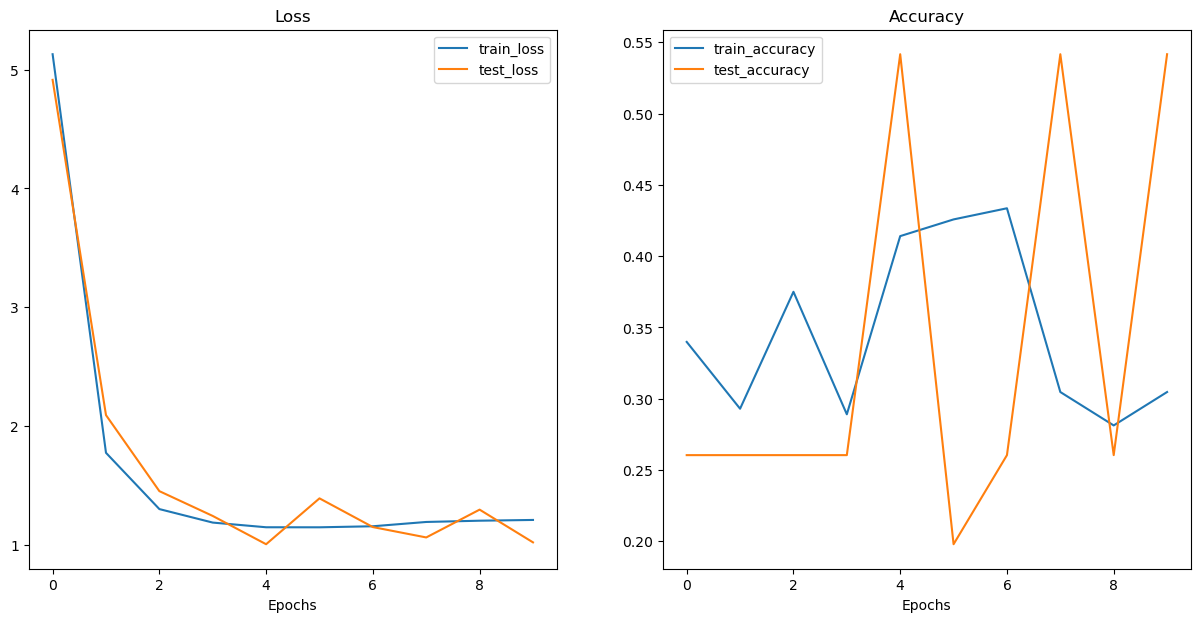

In [140]:
from helper_functions import plot_loss_curves

# plot our ViT model's loss curves
plot_loss_curves(results)

Looks like our model's loss curves are all over the place.

At least the loss looks like it's heading the right directoin but the accuracy curves don't really show much promise.


These results are likely because of the difference in data resources and training regime of our ViT model versus the ViT paper.

It seems our model is [severely underfitting]() (not achieving the results we'd like to).

<div class='alert alert-info'>
<h4 class='alert-header'>
    
How about we see if we can fix that by bringing in a pretrained ViT model?

</h4>
</div>

## 10. Using a pretrained ViT from `torchvision.models` on the same dataset

We've discussed the benefits of using pretrained models in [06. PyTorch Transfer Learning](). 

<div class='alert alert-info'>
<h4 class='alert-header'>
    
But since  we've now trained our own ViT from scratch and achieved less than optimal results, the benefits of transfer learning (using a pretrained model) will really shine.

</h4>
</div>

### 10.1 Why use a pretrained model?

An important note on many modern machine learning research papers is that much of the results are obtained with large datasets and vast compute resources.

And in modern day machine learning, the original fully trained ViT would likely not be considered a `super large` training setup (models are continually getting bigger and bigger).

Reading the ViT paper section 4.2:
> *Finally , the ViT-L/16 model pre-trained on the public imageNet-21k dataset performs well on most datasets too, while taking fewer resources to pre-train: it could be trained using a standard cloud TPUv3 with 8 cores in approximately **30 days**.*

As of Sep 2024, the price for renting a TPUv3 (Tensor Processing Unit version 3) with 8 cores on Google Cloud is $2 USD per hour.

To rent one for 30 straight days would cost **$1,440 USD**.

This cost (monetary and time) may be viable for some larger research teams or enterprises but for many people it's not.

So having a pretrained model available through resources like `torchvision.models`, the `timm` [(Torch Image models) library](https://github.com/huggingface/pytorch-image-models), the [HuggingFace Hub](https://huggingface.co/models) or even from the authors of the papers themselves (there's a growing trend for machine learning researchers to release the code and pretrained models from their research papers. I'm a big fan of this trend, many of these resources can be found on [Paperswithcode.com](https://paperswithcode.com/)

<div class='alert alert-info'>

<h4 class='alert-header'>

If you're focused on leveraging the benefits of a specific model architecture rather than creating your custom architecture, I'd highly recommend using pretrained model.

</h4>
</div>

### 10.2 Getting a pretrained ViT model and creating a feature extractor

We can get a pretrained ViT model from `torchvision.models`

We'll go from the top by first making sure we've got the right versions of `torch` and `torchvision`.

In [142]:
# The following requires torch v0.12+ and torchvision v0.13+
import torch
import torchvision

print(f"torch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")

torch version: 2.2.2
torchvision version: 0.17.2


Setup the device-agnostic code.

In [144]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

Finally, we'll get the pretrained ViT-Base with patch size 16 from `torchvision.models` and prepare it for our FoodVision Mini use case by turning it into a feature extractor transfer learning model.

<div class='alert alert-success'>

<h4>
Specifically, we'll:
</h4>

1. Get the pretrained weights for ViT-Base trained on ImageNet-1k from [`torchvision.models.ViT_B_16_Weights.DEFAULT`](https://pytorch.org/vision/stable/models/generated/torchvision.models.vit_b_16.html#torchvision.models.ViT_B_16_Weights) (`DEFAULT` gets us the best available model).
2. Setup a ViT model instance via `torchvision.models.vit_b_16`. pass it the pretrained weights step 1 and send it to the target device.
3. Freeze all of the parameters in the base ViT model created in step 2 by setting their `requires_grad` attribute to False
4. Update the classifier head of the ViT model created in step 2 to suit our own problem by changing the number of `out_features` to our number of classes (pizza, steak, sushi).

</div>

We covered steps like this in 06. `PyTorch Transfer Learning section 3.2: Seting up a pretrained models` and `section 3.4: Freezing the base model and changing the output layer to suit our needs`.

In [145]:
# 1. Get pretrained weights for the ViT-Base
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

# 2. Setup a ViT model instance with pretrained weights
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights)

# 3. Freeze the base parameters
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

# 4. Change the classifier head (set the seeds to ensure same initialization with linear head)
set_seeds()
pretrained_vit.heads = nn.Linear(in_features=768,
                                 out_features=len(class_names)
                                )
# pretrained_vit

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /Users/socms/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330M/330M [00:08<00:00, 42.2MB/s]


Pretrained ViT feature extra tor model created!

Let's now check it out by printing a `torchinfo.summary()`

In [146]:
summary(model=pretrained_vit,
        input_size=(32,3,224,224),
        col_names=['input_size','output_size','trainable', 'num_params'],
        col_width=20,
        row_settings=['var_names']
       )

Layer (type (var_name))                                      Input Shape          Output Shape         Trainable            Param #
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 3]              Partial              768
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    False                (590,592)
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       False                151,296
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       False                --
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       False                (7,087,872)
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [3

Wohooo!

![](yes.webp){height=100 width=150}

Notice how only the output layer is trainable, whereas, rest of the layers are frozen.

and the total number of parameters, 85,800,963, is the same as our custom made ViT model above.

But the number of trainable parameters for `pretrained_vit` is much, much lower than our custom `vit` at only `2,307` compared to 85,800,963 (in our custom vit, since we're training from scratch, all parameters are trainable).

That means the pretrained model should traina lot faster, we could potentially even use a larger batch size since less parameter updates are going to be taking up memory.

### 10.3 Preparing data for the pretrained ViT model

We downloaded and create DataLoaders for our own ViT model back in section 2.

So we don't necessarity need to do it again.

But in the name of practice, let's download some image data(pizza, steak, and susshi images for FoodVision Mini), setup train and test directories and then transform the images into tensors and DataLoaders.

We can download pizza, steak and sushi images from the course GitHub and the `download_data()` function we created in [07. PyTorch Experiment Tracking section 1](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#1-get-data).

In [147]:
from helper_functions import download_data

# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data/pizza_steak_sushi directory exists, skipping download.


PosixPath('data/pizza_steak_sushi')

Finally, we'll transform our images into tensors and turn the tensors into DataLoaders.

Since were using a pretrained model from `torchvision.models`, we can call the `transforms()` method on it to get its required transforms.

Remember, if you're going to use a pretrained model, it's generally important to **ensure your own custom data is transformed/formatted in the same way the original model was trained on**

We covered this method of "automatic" transform creation in 06. PyTorch Transfer Learning section 2.2.

In [149]:
# Get automatic transforms from pretrained ViT weights
pretrained_vit_transforms = pretrained_vit_weights.transforms()
print(pretrained_vit_transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


And now we've got transforms ready, we can turn our images into DataLoaders using the `data_setup.create_dataloaders()` method we created in `05. PyTorch Going Modular section 2`.

<div class='alert alert-info'>

Since `we're using a feature extractor model` (less trainable parameters), `we could increase` the `batch size to a higher value` (if we set it to 1024, we'd be mimicking an improvement found in [Better plain ViT baselines for ImageNet-1k], a paper which improves upon the original ViT paper and suggested extra reading).

<h4 class='alert-header'>
    
But since we only have ~200 training samples total, we'll stick with 32.

</h4>
</div>

In [150]:
# Setup dataloaders
train_dataloader_pretrained, test_dataloader_pretrained, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                     test_dir=test_dir,
                                                                                                     transform=pretrained_vit_transforms,
                                                                                                     batch_size=32) # Could increase if we had more samples, such as here: https://arxiv.org/abs/2205.01580 (there are other improvements there too...)


### 10.4 Train feature extractor ViT model

Feature extractor model is ready, DataLoaders are ready, now its time to train!!

As before we'll use the Adam optimizer (`torch.optim.Adam()`) with a learning rate of `1e-3` and `torch.nn.CrossEntropyLoss()` as the loss function.

Our `engine.train()` function we created in 05. PyTorch Going Modular section 4 will take care of the rest.

In [151]:
from going_modular.going_modular import engine

# Create optimizer and loss function
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(),
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

# Train the classifier head of the pretrained ViT feature extractor model
set_seeds()
pretrained_vit_results = engine.train(model=pretrained_vit,
                                      train_dataloader=train_dataloader_pretrained,
                                      test_dataloader=test_dataloader_pretrained,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7665 | train_acc: 0.7227 | test_loss: 0.5432 | test_acc: 0.8665
Epoch: 2 | train_loss: 0.3428 | train_acc: 0.9453 | test_loss: 0.3263 | test_acc: 0.8977
Epoch: 3 | train_loss: 0.2064 | train_acc: 0.9531 | test_loss: 0.2707 | test_acc: 0.9081
Epoch: 4 | train_loss: 0.1556 | train_acc: 0.9570 | test_loss: 0.2422 | test_acc: 0.9081
Epoch: 5 | train_loss: 0.1246 | train_acc: 0.9727 | test_loss: 0.2279 | test_acc: 0.8977
Epoch: 6 | train_loss: 0.1216 | train_acc: 0.9766 | test_loss: 0.2129 | test_acc: 0.9280
Epoch: 7 | train_loss: 0.0938 | train_acc: 0.9766 | test_loss: 0.2352 | test_acc: 0.8883
Epoch: 8 | train_loss: 0.0797 | train_acc: 0.9844 | test_loss: 0.2281 | test_acc: 0.8778
Epoch: 9 | train_loss: 0.1098 | train_acc: 0.9883 | test_loss: 0.2074 | test_acc: 0.9384
Epoch: 10 | train_loss: 0.0650 | train_acc: 0.9883 | test_loss: 0.1804 | test_acc: 0.9176


Damn.

Looks like our pretrained ViT feature extractor performed far better than our custom ViT model trained from scratch (in the same amount of time).

Let's go visual.

### 10.5 Plot feature extractor ViT model loss curves

Our pretrained ViT feature model numbers look good on the training and test sets.

How do the loss curves look?

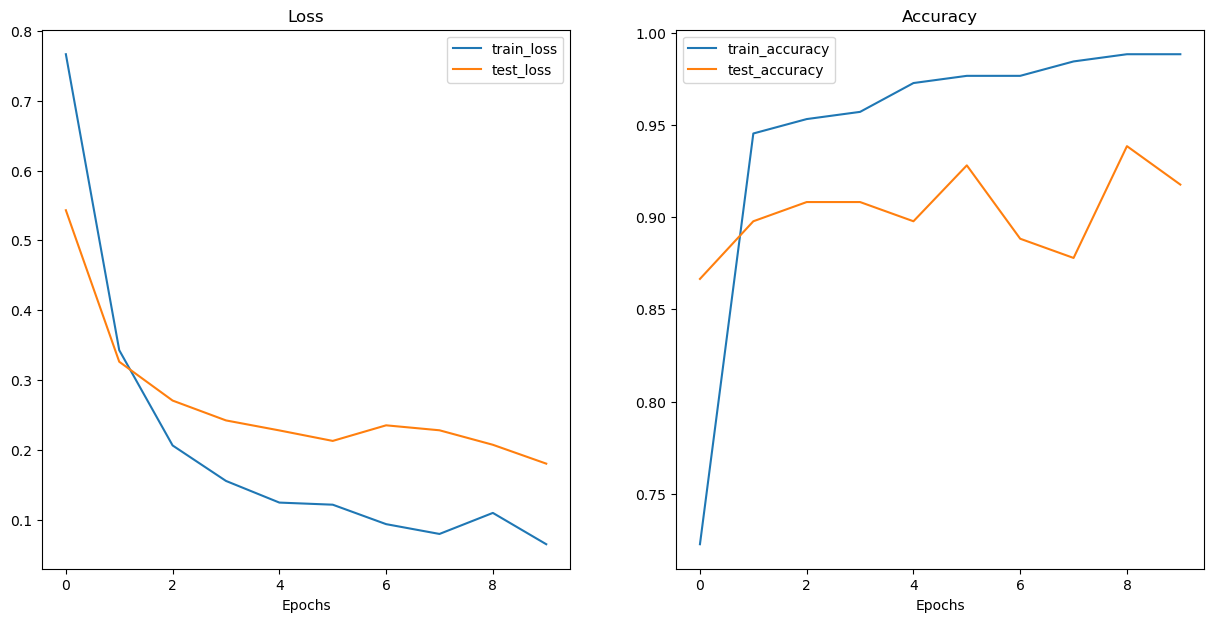

In [152]:
# Plot the loss curves
from helper_functions import plot_loss_curves

plot_loss_curves(pretrained_vit_results)

Woah!

Those are some close to textbook looking (`really good`) loss curves.

That's the power of transfer learning!

We managed to get ourstanding results with the same model architecture, except our custom implementation was trained from scratch (worse perormance) and this feature extractor model has the power of pretrianed weights from ImageNet behind it.

<div class='alert alert-warning'>

<h4 class='alert-header'>

What do you think?

Would our feature extractor model imporove more if we keep training it?
    
</h4>
</div>

### 10.6 Save feature extractor ViT model and check file size

it looks like our ViT feature extractor model is performing quite qell for our FoodVision problem

Perhaps we might want to try deploying it and see how it goes in production (in this case, deploying means putting our trained model in an application someone could use, say taking photos on their smartphone of food and seeing if our model thinks it's pizza, steak or sushi)

To do so we can first save our model with the `utils.save_model()` function we created in 05. PyTorch Going Modular section 5.

In [153]:
# Save the model
from going_modular.going_modular import utils

utils.save_model(model=pretrained_vit,
                 target_dir="models",
                 model_name="08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth")

[INFO] Saving model to: models/08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth


And since we're thinking about deploying this model, it'd be good to know the size of it(in megabytes or MB)


<div class='alert alert-success'>
<h4 class='alert-header'>

Since we want our FoodVision application to run fast, generally a `smaller model with good performance will` be `better` than a `large model with great perforamnce`

</h4>
</div>

We can check the size of our model in bytes using the `st_size` attribute of Python's `pathlib.Path().stat()` method whilst passing it our model's filepath name.

We can then scale the size in bytes to megabytes.

In [154]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_vit_model_size = Path("models/08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth").stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly)
print(f"Pretrained ViT feature extractor model size: {pretrained_vit_model_size} MB")

Pretrained ViT feature extractor model size: 327 MB


Hmm, looks like our ViT feature extractor model for Food Vision Mini turned out to be about 327 MB in size.

How does this compare to the `EffNetB2 feature extractor model` in `07. PyTorch Experiment Tracking section 9`?

|Model|	Model size (MB)|	Test loss|	Test accuracy|
|:-:|:-:|:-:|:-:|
|EffNetB2 feature extractor^|	29|	~0.3906|	~0.9384|
|ViT feature extractor|	327|	~0.1084|	~0.9384|

> ***Note**: The EffNetB2 model in reference was trained with 20% of pizza, steak and sushi data (double the amount of images) rather than the ViT feature extractor which was trained with 10% of pizza, steak and sushi data. An exercise would be to train the ViT feature extractor model on the same amount of data and see how much the results improve.*

The EffNetB2 model is ~11x smaller than the ViT model with similar results for test loss and accuracy.

However, the ViT model's results may improve more when trained with the same data (20% pizza, steak and sushi data).

But in terms of deployment, if we were comparing these two models, something we'd need to consider is whether the extra accuracy from the ViT model is worth the ~11x increase in model size?

Perhaps such a large model would take longer to load/run and wouldn't provide as good an experience as EffNetB2 which performs similarly but at a much reduced size.

## 11. Make prediction on a custom image

And finally, we'll finish with the ultimate test, predicting on our own custom data.

Let's download a custom image and use our ViT feature extractor to predict on it.

To do so, let's use the `pred_and_plot()` function we created in 06. PyTorch Transfer Learning section 6, for convenience, I saved this function to `going_modular.going_modular.predictions.py` on the course GitHub.


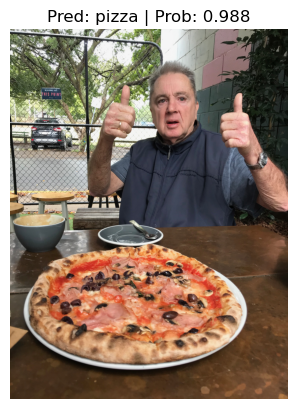

In [155]:
import requests

# Import function to make predictions on images and plot them
from going_modular.going_modular.predictions import pred_and_plot_image

# Setup custom image path
custom_image_path = image_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

# Predict on custom image
pred_and_plot_image(model=pretrained_vit,
                    image_path=custom_image_path,
                    class_names=class_names)

Two thumbs up!

Congratulations!

We've gone all the way from research paper to usable model code on our own custom images!

<div class='alert alert-success'>
    
<h4 class='alert-heading'>
    Main Takeaways
</h4>

- With the explosion of machine learning, new research papers detrailing advancements come out every day. And it's impossible to keep up with it *all* but you can narrow things down to your own use case, such as what we did here, replicating a computer vision paper for FoodVision Mini.
- Machine learning research papers often contain months of research by teams of smart people compressed into a few pages (so teasing out all the details and replicating the paper in full can be a bit of challenge).
- The goal of paper replicating is to turn machine learning research papers (text and math) into usable code.
    - With this being said, many machine learning research teams are starting to publish code with their papers and one of the best places to see this is at [Paperswithcode.com](https://paperswithcode.com/)
- Breaking a machine learning research paper into inputs and outputs (what goes in and out of each layer/block/model?) and layers (how does each layer manipulate the input?) and blocks (a collection of layers) and replicating each part step by step (like we've done in this notebook) can be very helpful for understanding.
- Pretrained models are available for many state of the art model architectures and with the power of transfer learning, those often perform *very* well with little data.
- Larger models generally perform better but have a larger footprint too (they take up more storage space and can take longer to perform inference).
   - A big question is: deployment wise, is the extra performance of a larger model worth it/aligned with the use case?

</div>